## [1. Initial setup and modules/packages loading](#InitialSetup)
* [**1.1 - Import libraries &  dataframe**](#import)
* [**1.2 - Data correction**](#Datacorrection)
* [**1.3 - Definition of cluster perspectives and selection of variables**](#Perspective)
* [**1.4 - Standardize Vision Dataframes**](#Standard)


## [2. Data Understanding](#DataUnderstanding)


## [3. Data Preparation](#DataPreparation)
* [**3.1. Checking duplicated lines**](#Duplicates)
    * [3.1.1. Make Copies of the Original dataset](#Copies)
    * [3.1.2. Replacing Values](#ReplacingValues)
    * [3.1.3. Set an index](#SetIndex)
* [**3.2 Data Cleaning**](#DataCleaning)
    * [3.2.1. Checking Missing Values](#CheckingMissingValues)
    * [3.2.2 Filter out missing values](#fmv)
    * [3.2.3. Fill in missing values and drop remaining rows](#fmvd)
    * [3.2.4. Detect and Treat the outliers](#dto)
    * [3.2.5 Skewness And Kurtosis](#sk)
    * [3.2.6. Check Correlations](#cc)


## [4. Feature Engineering](#fe)
* [**4.1. Changing Variables**](#cv)


## [5. Modeling](#m)
* [**5.1. RFM Model**](#rfm)


## [6. Data Visualization](#dv)
* [**6.1. General analysis**](#ga)


## [7. Recommendation  systems](#rs)


<a class="anchor" id="InitialSetup">
    
# 1. Initial setup and modules/packages loading

In [17]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import ipympl
from mpl_toolkits.mplot3d import Axes3D
import squarify
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

# Force widgets to be shown on notebook (may need permissions from the user)
%matplotlib widget
%matplotlib inline

In [18]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [19]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

<a class="anchor" id="DataUnderstanding">
    
# 2. Data Understanding

In [20]:
# Add Attractions sheet to Reviews
dseurotop = pd.ExcelFile('EuropeTop100Attractions_ENG_20190101_20210821.xlsx')

# 'extrai' aba 1
dfReviews = pd.read_excel(dseurotop, sheet_name='Reviews')

# 'extrai' aba 2
dfAttractions = pd.read_excel(dseurotop, sheet_name='Attractions')

In [22]:
# Changing first column name
dfAttractions.rename(columns = {'ID':'localID'},
                     inplace = True)

# merge tabs
dseurotopattractions = dfReviews.merge(dfAttractions, on='localID', how='left', validate='m:1')

# Rename the file to eurotop
dseurotop = dseurotopattractions

In [23]:
# Display info
dseurotop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92120 entries, 0 to 92119
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92100 non-null  object        
 7   userLocation       78652 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

In [24]:
# Display top 10 rows
dseurotop.head(10)

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",Basilica of the Sagrada Familia,Spain,ES
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,Basilica of the Sagrada Familia,Spain,ES
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,Basilica of the Sagrada Familia,Spain,ES
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...,Basilica of the Sagrada Familia,Spain,ES
5,MAG001,2021-08-20 08:24:40.168,4.5,1,1186,163828,paul n@pauln3630,"Towaco, NJ",21,NaN,2021-08-15,2021-08-01,3,en,The sheer height of this church makes it a onc...,Basilica of the Sagrada Familia,Spain,ES
6,MAG001,2021-08-20 08:24:40.190,4.5,1,1186,163828,Edwin R@edwinrL7667XX,NaN,4,NaN,2021-08-14,2021-08-01,5,en,"My 2nd trip to Barcelona, but 1st time inside ...",Basilica of the Sagrada Familia,Spain,ES
7,MAG001,2021-08-20 08:24:40.227,4.5,1,1186,163828,quincy2008@quincy2008,"Barnsley, UK",137,Family,2021-08-12,2021-07-01,4,en,To see it is to believe it. This an epic build...,Basilica of the Sagrada Familia,Spain,ES
8,MAG001,2021-08-20 08:24:40.259,4.5,1,1186,163828,Elanita@Elanita,"Sofiyivska Borschagivka, Ukraine",49,Friends,2021-08-11,2021-08-01,5,en,"Read a little bit before you are going in, if ...",Basilica of the Sagrada Familia,Spain,ES
9,MAG001,2021-08-20 08:24:40.272,4.5,1,1186,163828,Susan A@C9769QCsusana,NaN,4,NaN,2021-08-11,2021-08-01,5,en,I ordered up a short day trip for my daughter ...,Basilica of the Sagrada Familia,Spain,ES


In [25]:
# Summary statistics for all variables
dseurotop.describe(include='all', datetime_is_numeric=True).T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,92120,100,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,NaN,NaN,NaN,2021-08-20 22:09:20.598932992,2021-08-20 08:24:40.077000,2021-08-20 12:08:10.831000064,2021-08-20 15:46:58.171000064,2021-08-21 12:35:39.817250048,2021-08-21 16:27:17.026000,NaN
globalRating,92120.0,NaN,NaN,NaN,4.485166,4.0,4.5,4.5,4.5,5.0,0.178085
positionOnRanking,92120.0,NaN,NaN,NaN,3.91459,1.0,1.0,2.0,6.0,55.0,4.843013
sitesOnRanking,92120.0,NaN,NaN,NaN,748.263537,5.0,154.0,484.0,1186.0,3837.0,802.742304
totalReviews,92120.0,NaN,NaN,NaN,40556.601813,5179.0,14152.0,24454.0,51324.0,163828.0,42914.381014
userName,92100,65785,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78652,12613,"London, UK",3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,477.52056,0.0,20.0,66.0,215.0,607732.0,7270.518677
tripType,63052,5,Couples,31702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


General observations:

- There are a total of 100 unique attractions with a total of 92120 reviews
- The most evaluated attraction is MAG001 with 8309 reviews
- There are 5 different types of trips and the most frequent is Couples with 31702 presences
- The review varies between 1 and 5
- All the reviews are in one Language - English

Considerations on data quality:
- *extractionDate*, *reviewWritten* and *reviewVisited* are date/time variables and are recognize as such
- *localID, userName, userLocation, tripType, reviewLanguage, reviewFullText, Name, Country, ISO* are a categorical variables
- *userLocation, reviewVisited* have a high proportion of missing values
- *positionOnRanking, sitesOnRanking, userContributions* seem to have outliers

In [26]:
# Check the differences in the summary statistics for all variables
dseurotop.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
localID,92120,100,MAG001,8309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,NaN,NaN,NaN,2021-08-20 22:09:20.598932992,2021-08-20 08:24:40.077000,2021-08-20 12:08:10.831000064,2021-08-20 15:46:58.171000064,2021-08-21 12:35:39.817250048,2021-08-21 16:27:17.026000,NaN
globalRating,92120.0,NaN,NaN,NaN,4.485166,4.0,4.5,4.5,4.5,5.0,0.178085
positionOnRanking,92120.0,NaN,NaN,NaN,3.91459,1.0,1.0,2.0,6.0,55.0,4.843013
sitesOnRanking,92120.0,NaN,NaN,NaN,748.263537,5.0,154.0,484.0,1186.0,3837.0,802.742304
totalReviews,92120.0,NaN,NaN,NaN,40556.601813,5179.0,14152.0,24454.0,51324.0,163828.0,42914.381014
userName,92100,65785,Malgorzata@Margo7850p,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78652,12613,"London, UK",3710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,477.52056,0.0,20.0,66.0,215.0,607732.0,7270.518677
tripType,63052,5,Couples,31702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Check localID
dseurotop['localID'].value_counts()

MAG001    8309
MAG003    5568
u         5060
MAG024    2872
MAG002    2834
          ... 
MAG068      86
MAG098      81
MAG094      73
MAG099      60
MAG100      51
Name: localID, Length: 100, dtype: int64

In [28]:
#Check summary statistics for categorical variables

dseurotop.describe(include = ['O'])

,localID,userName,userLocation,tripType,reviewLanguage,reviewFullText,Name,Country,ISO
count,92120,92100,78652,63052,92120,92120,86560,86560,86560
unique,100,65785,12613,5,1,85088,97,25,24
top,MAG001,Malgorzata@Margo7850p,"London, UK",Couples,en,We had an absolutely wonderful time and it is ...,Basilica of the Sagrada Familia,Spain,ES
freq,8309,31,3710,31702,92120,3,8309,22232,22232


In [29]:
#Check number of values

dseurotop.count()

localID              92120
extractionDate       92120
globalRating         92120
positionOnRanking    92120
sitesOnRanking       92120
totalReviews         92120
userName             92100
userLocation         78652
userContributions    92120
tripType             63052
reviewWritten        92120
reviewVisited        91410
reviewRating         92120
reviewLanguage       92120
reviewFullText       92120
Name                 86560
Country              86560
ISO                  86560
dtype: int64

In [30]:
#Check distribution of reviewRating 

dseurotop['reviewRating'].value_counts()

5    65471
4    18688
3     5100
2     1518
1     1343
Name: reviewRating, dtype: int64

In [31]:
#Check distribution of globalRating 

dseurotop['globalRating'].value_counts()

4.5    80353
4.0     7250
5.0     4517
Name: globalRating, dtype: int64

In [32]:
#Check distribution of trip Type

dseurotop['tripType'].value_counts()

Couples     31702
Family      13596
Friends     11759
Solo         5127
Business      868
Name: tripType, dtype: int64

In [33]:
#Check first Review date

dseurotop['reviewWritten'].min()

Timestamp('2019-01-01 00:00:00')

In [34]:
#Check last Review date

dseurotop['reviewWritten'].max()

Timestamp('2021-08-21 00:00:00')

In [35]:
#Check last Visit date

dseurotop['reviewVisited'].min()

Timestamp('2015-10-01 00:00:00')

In [36]:
#Check last Visit date

dseurotop['reviewVisited'].max()

Timestamp('2021-08-01 00:00:00')

<a class="anchor" id="DatasetPreparation">

# 3. Data Preparation

</a>

After performing Data Understanding this Project will step up to the Data Preparation phase. 
In this phase, we are going to perform some useful commands as preprocessing tasks to prepare and clean the dataset.
After this data preparation we will be able to better approach the data.

Following steps:
- Check Duplicated Data; <br>
- Make copies of the original dataset; <br>
- Replace values; <br>
- Data Cleaning; <br>

<a class="anchor" id="Duplicates">

## 3.1. Checking duplicated lines

In [37]:
# Check for duplicates
dseurotop.duplicated().sum()

0

In [38]:
# Check duplicated lines
dseurotop[dseurotop.duplicated(keep=False)]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO


<a class="anchor" id="Copies">

## 3.1.1. Make Copies of the Original dataset

In [39]:
dseurotop_prep = dseurotop.copy()
dseurotop_prep.head()

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",Basilica of the Sagrada Familia,Spain,ES
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,Basilica of the Sagrada Familia,Spain,ES
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,Basilica of the Sagrada Familia,Spain,ES
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...,Basilica of the Sagrada Familia,Spain,ES


<a class="anchor" id="ReplacingValues">

## 3.1.2. Replacing Values

Looking into the dataset information the group understood that there are values which will need to be replaced.

- LocalID Column

In the Understading phase, the group have grouped from the 'csv' dataset two sheets ('reviews' and 'attractions') and connected them within the LocalID. But, after some analysis, were identified that there are 2 different types of LocalID which couldnt be connected with any attraction in a first place, the 'genis' and 'u' localIDs. Because of this, we have done a deep analysis throughout other information available in the review sheet, such as comments on 'reviewFullText', 'sitesOnRanking' and 'positionOnRanking', those info pointed for the following conclusion:

    - genis = MAG005
    - u = MAG006
    
For more information, check analysis below:

In [40]:
cols = ['localID']
dseurotop_prep[cols].apply(pd.Series.value_counts)

,localID
MAG001,8309
MAG003,5568
u,5060
MAG024,2872
MAG002,2834
...,...
MAG068,86
MAG098,81
MAG094,73
MAG099,60


In [41]:
#Cheking the localID which does not contains "MAG"

dseurotop_notmag = dseurotop_prep[~dseurotop_prep['localID'].str.contains('MAG')]
cols_1 = ['localID']
dseurotop_notmag[cols_1].apply(pd.Series.value_counts)

,localID
u,5060
genis,500


In [42]:
# Checking if the PositionOnRanking is the same for every line
dseurotop_notmag['positionOnRanking'].value_counts()

8    5060
2     500
Name: positionOnRanking, dtype: int64

In [43]:
# Checking if the sitesOnRanking is the same for every line
dseurotop_notmag['sitesOnRanking'].value_counts()

487     5060
1234     500
Name: sitesOnRanking, dtype: int64

In [44]:
dseurotop_prep[dseurotop_prep['localID'].str.contains('u')].head()

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
19000,u,2021-08-20 11:25:41.720,4.5,8,487,51324,Chris C@chriscX807MN,NaN,7,Family,2021-08-19,2021-08-01,4,en,Interesting visit. Lots to see. Staff very hel...,NaN,NaN,NaN
19001,u,2021-08-20 11:25:41.743,4.5,8,487,51324,Carol J@carolj137,"Swansea, UK",3,Couples,2021-08-18,2021-08-01,5,en,What a fantastic experience friendly atmosph...,NaN,NaN,NaN
19002,u,2021-08-20 11:25:41.774,4.5,8,487,51324,Michaela K@michaelak837,NaN,2094,Couples,2021-08-16,2021-08-01,4,en,"Went to visit the castle, it's been very nice ...",NaN,NaN,NaN
19003,u,2021-08-20 11:25:41.793,4.5,8,487,51324,RachelL84@RachelL84,"Oxford, UK",125,Couples,2021-08-16,2021-08-01,5,en,Great visit. Would highly recommend. Everythin...,NaN,NaN,NaN
19004,u,2021-08-20 11:25:41.821,4.5,8,487,51324,bethan@bethanferrier,"Tetney, UK",5,Couples,2021-08-16,2021-08-01,5,en,Really enjoyed our visit and I was lucky enoug...,NaN,NaN,NaN


In [45]:
#looking into a dataset with only LocalID genis, in order to check specific descripitons on 'reviewFullText'
dseurotop_genislocalID = dseurotop_notmag[dseurotop_notmag['localID'].str.contains('genis')]

#looking for specific words, regarding our check into the 'csv' dataset
dseurotop_genislocalID[dseurotop_genislocalID['reviewFullText'].str.contains('Staromestske')]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
18643,genis,2021-08-20 11:20:34.599,4.5,2,1234,55541,Brian@brianlH5843MX,"Bath, UK",257,NaN,2019-12-09,2019-12-01,5,en,Staromestske namesti was founded in the 12th c...,NaN,NaN,NaN
18653,genis,2021-08-20 11:20:36.863,4.5,2,1234,55541,Brian@brianlH5843MX,"Bath, UK",257,NaN,2019-12-09,2019-12-01,5,en,Staromestske namesti was founded in the 12th c...,NaN,NaN,NaN
18705,genis,2021-08-20 11:21:03.766,4.5,2,1234,55541,tk3232@tk3232,"Sugar Land, TX",3163,NaN,2019-10-03,2019-09-01,4,en,"Nestled in the bend of the river, this is the ...",NaN,NaN,NaN
18881,genis,2021-08-20 11:22:40.169,4.5,2,1234,55541,Jana S@K8304JQjanas,"Prague, Czech Republic",491,Friends,2019-05-07,2019-05-01,4,en,If you want to feel how the heart of Prague is...,NaN,NaN,NaN
18904,genis,2021-08-20 11:22:50.839,4.5,2,1234,55541,Z D@ZD98,"Heiloo, The Netherlands",85,Business,2019-04-14,2019-04-01,4,en,A beautiful historical place with quite a few ...,NaN,NaN,NaN
18917,genis,2021-08-20 11:22:56.272,4.5,2,1234,55541,OzYuval@OzYuval,"Rosh Pina, Israel",177,Friends,2019-03-27,2019-03-01,5,en,Old Prague Square (Staromestske namesti) is an...,NaN,NaN,NaN
18962,genis,2021-08-20 11:25:15.245,4.5,2,1234,55541,AlbertSalichs@AlbertSalichs,"Manresa, Spain",8251,Family,2019-02-13,2018-04-01,5,en,"Staromestske Namesti is the Old Town Square, p...",NaN,NaN,NaN


In [46]:
#looking for specific words, regarding our check into the 'csv' dataset
dseurotop_genislocalID[dseurotop_genislocalID['reviewFullText'].str.contains('Prague')]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
18501,genis,2021-08-20 11:19:08.230,4.5,2,1234,55541,Angela S@angelasJ5518LZ,"Riga, Latvia",67,NaN,2021-08-18,2021-08-01,5,en,"One of the must-see places, it is impossible t...",NaN,NaN,NaN
18502,genis,2021-08-20 11:19:08.258,4.5,2,1234,55541,Arsila@shibho,"Amsterdam, The Netherlands",57,NaN,2021-08-15,2020-09-01,5,en,The heart of Prague does not disappoint. Bewar...,NaN,NaN,NaN
18511,genis,2021-08-20 11:19:10.498,4.5,2,1234,55541,Angela S@angelasJ5518LZ,"Riga, Latvia",67,NaN,2021-08-18,2021-08-01,5,en,"One of the must-see places, it is impossible t...",NaN,NaN,NaN
18512,genis,2021-08-20 11:19:10.537,4.5,2,1234,55541,Arsila@shibho,"Amsterdam, The Netherlands",57,NaN,2021-08-15,2020-09-01,5,en,The heart of Prague does not disappoint. Bewar...,NaN,NaN,NaN
18520,genis,2021-08-20 11:19:32.524,4.5,2,1234,55541,alanh45953@alanh45953,"Henderson, NV",833,NaN,2020-09-10,2019-11-01,5,en,Hi. Just a great place. This square was used i...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18977,genis,2021-08-20 11:25:20.117,4.5,2,1234,55541,BohoMe9@BohoMe9,"Prague, Czech Republic",33,Couples,2019-01-16,2018-12-01,5,en,When visiting Prague you can not miss the Old ...,NaN,NaN,NaN
18985,genis,2021-08-20 11:25:24.930,4.5,2,1234,55541,Rogneda@R0gnedaCraft,"Zvenigorod, Russia",67,Family,2019-01-10,2018-06-01,5,en,"I love this place! It's atmosphere, location, ...",NaN,NaN,NaN
18990,genis,2021-08-20 11:25:29.586,4.5,2,1234,55541,ivanka156@ivanka156,NaN,6,Couples,2019-01-06,2018-12-01,5,en,If u go to Prague u should visit Old Town Squa...,NaN,NaN,NaN
18992,genis,2021-08-20 11:25:29.633,4.5,2,1234,55541,Rabih SOUAID@Rabih-SOUAID,"Beirut, Lebanon",2212,Solo,2019-01-06,2018-12-01,5,en,Free.24/7 This is the best part of your Prague...,NaN,NaN,NaN


In [47]:
#looking into a dataset with only LocalID 'u', in order to check specific descripitons on 'reviewFullText'
dseurotop_ulocalID = dseurotop_notmag[dseurotop_notmag['localID'].str.contains('u')]

#looking for specific words, regarding our check into the 'csv' dataset
dseurotop_ulocalID[dseurotop_ulocalID['reviewFullText'].str.contains('Edinburgh')]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
19002,u,2021-08-20 11:25:41.774,4.5,8,487,51324,Michaela K@michaelak837,NaN,2094,Couples,2021-08-16,2021-08-01,4,en,"Went to visit the castle, it's been very nice ...",NaN,NaN,NaN
19003,u,2021-08-20 11:25:41.793,4.5,8,487,51324,RachelL84@RachelL84,"Oxford, UK",125,Couples,2021-08-16,2021-08-01,5,en,Great visit. Would highly recommend. Everythin...,NaN,NaN,NaN
19006,u,2021-08-20 11:25:41.868,4.5,8,487,51324,Ken H@kenhI2641SB,"Ipswich, UK",555,NaN,2021-08-15,2021-08-01,5,en,Like many we arrived Edinburgh hoping to visit...,NaN,NaN,NaN
19008,u,2021-08-20 11:25:41.899,4.5,8,487,51324,Sebastian P@U1672IWsebastianp,"Ipswich, UK",3,NaN,2021-08-12,2021-08-01,4,en,Well worth a visit.Wonderful view of the city ...,NaN,NaN,NaN
19012,u,2021-08-20 11:25:47.211,4.5,8,487,51324,Sue A@susana397,NaN,33,Family,2021-08-11,2021-08-01,5,en,We booked online for a child a carer and 1 di...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24046,u,2021-08-20 12:17:35.681,4.5,8,487,51324,Sara V@saravJ2505MX,"Chelmsford, UK",19,Couples,2019-01-03,2018-10-01,5,en,The castle is so big and you can learn a lot a...,NaN,NaN,NaN
24047,u,2021-08-20 12:17:35.720,4.5,8,487,51324,Stellsnic@Stellsnic,"Melbourne, Australia",17,Couples,2019-01-03,2019-01-01,5,en,Historical location with amazing views of Edin...,NaN,NaN,NaN
24050,u,2021-08-20 12:17:40.903,4.5,8,487,51324,SheridanFearn@SheridanFearn,"Coventry, UK",33,Couples,2019-01-02,2018-12-01,3,en,Visited here whilst in Edinburgh for New Year...,NaN,NaN,NaN
24052,u,2021-08-20 12:17:40.950,4.5,8,487,51324,Elane@247elaneb,"East Olympia, WA",24,Solo,2019-01-01,2018-12-01,5,en,To picture the knights and horses riding throu...,NaN,NaN,NaN


In [48]:
#looking for specific words, regarding our check into the 'csv' dataset
dseurotop_ulocalID[dseurotop_ulocalID['reviewFullText'].str.contains('castle')]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
19002,u,2021-08-20 11:25:41.774,4.5,8,487,51324,Michaela K@michaelak837,NaN,2094,Couples,2021-08-16,2021-08-01,4,en,"Went to visit the castle, it's been very nice ...",NaN,NaN,NaN
19006,u,2021-08-20 11:25:41.868,4.5,8,487,51324,Ken H@kenhI2641SB,"Ipswich, UK",555,NaN,2021-08-15,2021-08-01,5,en,Like many we arrived Edinburgh hoping to visit...,NaN,NaN,NaN
19008,u,2021-08-20 11:25:41.899,4.5,8,487,51324,Sebastian P@U1672IWsebastianp,"Ipswich, UK",3,NaN,2021-08-12,2021-08-01,4,en,Well worth a visit.Wonderful view of the city ...,NaN,NaN,NaN
19009,u,2021-08-20 11:25:41.930,4.5,8,487,51324,Debbie S@92HolidayTraveller,"Ripe, null, United Kingdom",33,NaN,2021-08-12,2021-08-01,4,en,"The castle is very historic, although I would ...",NaN,NaN,NaN
19010,u,2021-08-20 11:25:47.165,4.5,8,487,51324,Gaynor91@Gaynor91,"Cardiff, UK",547,NaN,2021-08-12,2021-08-01,5,en,Booked the 12-30pm - 1.00pm slot to see the ca...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24050,u,2021-08-20 12:17:40.903,4.5,8,487,51324,SheridanFearn@SheridanFearn,"Coventry, UK",33,Couples,2019-01-02,2018-12-01,3,en,Visited here whilst in Edinburgh for New Year...,NaN,NaN,NaN
24054,u,2021-08-20 12:17:41.013,4.5,8,487,51324,Michael H@michaelh206,"Portsmouth, UK",592,Couples,2019-01-01,2019-01-01,4,en,Never made it into the Castle as we visited on...,NaN,NaN,NaN
24057,u,2021-08-20 12:17:41.091,4.5,8,487,51324,Peter C@PeterC652,"Reading, UK",131,Family,2019-01-01,2019-01-01,4,en,"You can spend many hours at the castle , there...",NaN,NaN,NaN
24058,u,2021-08-20 12:17:41.106,4.5,8,487,51324,Julia K@R4251TBjuliak,NaN,12,Family,2019-01-01,2019-01-01,5,en,We are absolutely excited from this place. His...,NaN,NaN,NaN


In [49]:
#Conclusion> Adjusting LocalID in the original dataset

# "u" = 'MAG006' = Name: Staromestske namesti = Country:Czech Republic = ISO:CZ
# "genis" = 'MAG005' = Name: Edinburgh Castle = Country:Scotland = ISO:UK


dseurotop_prep['localID'].replace(to_replace = 'u',value = 'MAG006', inplace = True)
dseurotop_prep['localID'].replace(to_replace = 'genis',value = 'MAG005', inplace = True)

In [50]:
#Drop the columns merge before
dseurotop_prepreset = dseurotop_prep.drop(['Name','Country','ISO'], axis=1)

#Merge again with correct LocalIDs
dseurotop_prep1 = dseurotop_prepreset.merge(dfAttractions, on='localID', how='left', validate='m:1')

#Original Dataset Updated
dseurotop_prep1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92120 entries, 0 to 92119
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92100 non-null  object        
 7   userLocation       78652 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

<a class="anchor" id="SetIndex">

## 3.1.3. Set an index

In [51]:
dseurotop_prep1.set_index('localID', inplace = True)
dseurotop_prep1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92120 entries, MAG001 to MAG100
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   extractionDate     92120 non-null  datetime64[ns]
 1   globalRating       92120 non-null  float64       
 2   positionOnRanking  92120 non-null  int64         
 3   sitesOnRanking     92120 non-null  int64         
 4   totalReviews       92120 non-null  int64         
 5   userName           92100 non-null  object        
 6   userLocation       78652 non-null  object        
 7   userContributions  92120 non-null  int64         
 8   tripType           63052 non-null  object        
 9   reviewWritten      92120 non-null  datetime64[ns]
 10  reviewVisited      91410 non-null  datetime64[ns]
 11  reviewRating       92120 non-null  int64         
 12  reviewLanguage     92120 non-null  object        
 13  reviewFullText     92120 non-null  object        
 14  Name 

<a class="anchor" id="DataCleaning">

## 3.2  Data Cleaning

</a>


- Check missing values; <br>
- Filter out missing values; <br>
- Fill in missing values and drop remaining rows; <br>
- Convert datatypes; <br>
- Check Correlations; <br>
- Detect and remove outliers; <br>

<a class="anchor" id="cmv">

### 3.2.1. Checking Missing Values

In [52]:
# Check for missing values 
dseurotop_prep1.isnull().sum()

extractionDate           0
globalRating             0
positionOnRanking        0
sitesOnRanking           0
totalReviews             0
userName                20
userLocation         13468
userContributions        0
tripType             29068
reviewWritten            0
reviewVisited          710
reviewRating             0
reviewLanguage           0
reviewFullText           0
Name                     0
Country                  0
ISO                      0
dtype: int64

In [53]:
# Check for missing values %
dseurotop_prep1.isna().sum()/len(dseurotop_prep)*100

extractionDate        0.000000
globalRating          0.000000
positionOnRanking     0.000000
sitesOnRanking        0.000000
totalReviews          0.000000
userName              0.021711
userLocation         14.620061
userContributions     0.000000
tripType             31.554494
reviewWritten         0.000000
reviewVisited         0.770734
reviewRating          0.000000
reviewLanguage        0.000000
reviewFullText        0.000000
Name                  0.000000
Country               0.000000
ISO                   0.000000
dtype: float64

<a class="anchor" id="fmv">

### 3.2.2 Filter out missing values

In [54]:
# drop any row containing missing values
dseurotopRows_no_missing = dseurotop_prep1.dropna()
print("The number of rows in the original dseurotop dataset is", dseurotop_prep1.shape[0])
print("The number of rows in the dseurotop dataset with no missing values is", dseurotopRows_no_missing.shape[0])
print("There were", dseurotop_prep1.shape[0]-dseurotopRows_no_missing.shape[0], "rows containing missing values.")

The number of rows in the original dseurotop dataset is 92120
The number of rows in the dseurotop dataset with no missing values is 53882
There were 38238 rows containing missing values.


In [55]:
# drop rows where all cells in that row are NA
dseurotopRows_cleaned = dseurotop_prep1.dropna(how='all')
print("The number of rows in the tugas dataset with no missing rows is", dseurotopRows_cleaned.shape[0])

The number of rows in the tugas dataset with no missing rows is 92120


In [56]:
# Filtering on missing values (mv)
import matplotlib.ticker as mtick
dseurotop_mv=dseurotop_prep1.copy()
dseurotop_mv = pd.DataFrame(dseurotop_prep1.isna().sum(),
                        columns = ['Missings']).sort_values(by = 'Missings', ascending = False)

dseurotop_mv = dseurotop_mv[dseurotop_mv['Missings'] > 0].copy()
dseurotop_mv

,Missings
tripType,29068
userLocation,13468
reviewVisited,710
userName,20


In [57]:
dseurotop_mv_perc = pd.DataFrame(dseurotop_prep1.isna().sum()/dseurotop_prep1.shape[0],
                        columns = ['Missings (%)']).sort_values(by = 'Missings (%)', ascending = False)
dseurotop_mv_perc = dseurotop_mv_perc[dseurotop_mv_perc['Missings (%)'] > 0].copy()
dseurotop_mv_perc

,Missings (%)
tripType,0.315545
userLocation,0.146201
reviewVisited,0.007707
userName,0.000217


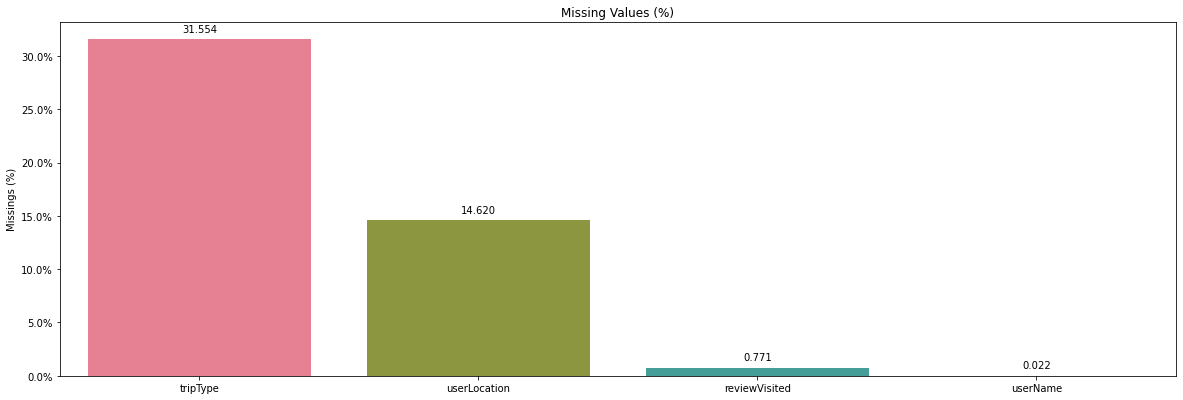

In [58]:
import matplotlib.ticker as mtick

dseurotop_mv = pd.DataFrame(dseurotop_prep1.isna().sum()/dseurotop_prep1.shape[0],
                        columns = ['Missings (%)']).sort_values(by = 'Missings (%)', ascending = False)
dseurotop_mv = dseurotop_mv[dseurotop_mv['Missings (%)'] > 0].copy()

plt.figure(figsize = (20,6.5))

ax = sns.barplot(data = dseurotop_mv, x = dseurotop_mv.index, y = 'Missings (%)', palette="husl" )
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for p in ax.patches:
    ax.annotate(format(p.get_height()*100, '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.title('Missing Values (%)')
plt.show()

By calculating the relative frequency of missing values is possible to see missing in "username" column representing 0.02% of the dataset, for this small percentage we believe that we can exclude those variables. 
Moreover, for the missing values in the column "reviewVisited", even it is much less than 1% of the dataset, the group has decided to keep them using  "reviewWritten" column.

Because there are many missing values for tripType and userLocation and since it will make a difference in our analysis, we decided to attribute to tripType missing values the word 'Other' and userLocation missing values the word 'Unknown'.

<a class="anchor" id="fmvd">

### 3.2.3. Fill in missing values and drop remaining rows

In [59]:
# Drop missing values from column "userName"
dseurotop_fill = dseurotop_prep1.dropna(subset=["userName", "reviewVisited"])
dseurotop_fill.shape

(91410, 17)

In [60]:
#Filling missing values: userLocation with Unknown & tripType with Other

dseurotop_prep2 = dseurotop_fill.fillna({
    'userLocation': "Unknown",
    'tripType': "Other"    
})
dseurotop_prep2

,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
localID,,,,,,,,,,,,,,,,,
MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",Basilica of the Sagrada Familia,Spain,ES
MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,Basilica of the Sagrada Familia,Spain,ES
MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,Basilica of the Sagrada Familia,Spain,ES
MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,Unknown,7,Other,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...,Basilica of the Sagrada Familia,Spain,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAG100,2021-08-21 16:27:11.795,4.5,11,677,5179,David M@DTM56,"Cambridge, UK",2055,Couples,2019-03-04,2019-02-01,5,en,A lovely old rambling centre with no logical l...,Centro Storico,Italy,IT
MAG100,2021-08-21 16:27:11.893,4.5,11,677,5179,robert_bos53@robert_bos53,"Geneva, Switzerland",1802,Friends,2019-02-25,2019-02-01,5,en,A one day visit from Rome in February: the his...,Centro Storico,Italy,IT
MAG100,2021-08-21 16:27:11.993,4.5,11,677,5179,Mmarymomm@Mmarymomm,"Pleasanton, CA",1738,Couples,2019-02-14,2018-12-01,5,en,"Is there a more beautiful, historical, and art...",Centro Storico,Italy,IT


In [61]:
dseurotop_prep2.isna().sum().sum()

0

In [62]:
dseurotop_prep2.shape

(91410, 17)

<a class="anchor" id="dto">

### 3.2.4. Detect and Treat the outliers

In [63]:
dseurotop_prep2.shape

(91410, 17)

In [64]:
dseurotop_prep2.describe().T

,count,mean,std,min,25%,50%,75%,max
globalRating,91410.0,4.485844,0.177676,4.0,4.5,4.5,4.5,5.0
positionOnRanking,91410.0,3.915414,4.854996,1.0,1.0,2.0,6.0,55.0
sitesOnRanking,91410.0,749.344295,803.511493,5.0,154.0,484.0,1186.0,3837.0
totalReviews,91410.0,40539.795712,42940.945806,5179.0,14152.0,24454.0,51324.0,163828.0
userContributions,91410.0,479.642512,7298.487086,0.0,20.0,66.0,216.0,607732.0
reviewRating,91410.0,4.580713,0.789700,1.0,4.0,5.0,5.0,5.0


From the statiscal summary above, when we look and compare the minimum values against the maximum values, but also through the standard deviation, we can instantly tell that we have some outliers in the "totalReviews", "usercontributions","sitesOnRanking" and finally "positionOnRanking" variables. We will get deeper with the graphs help.

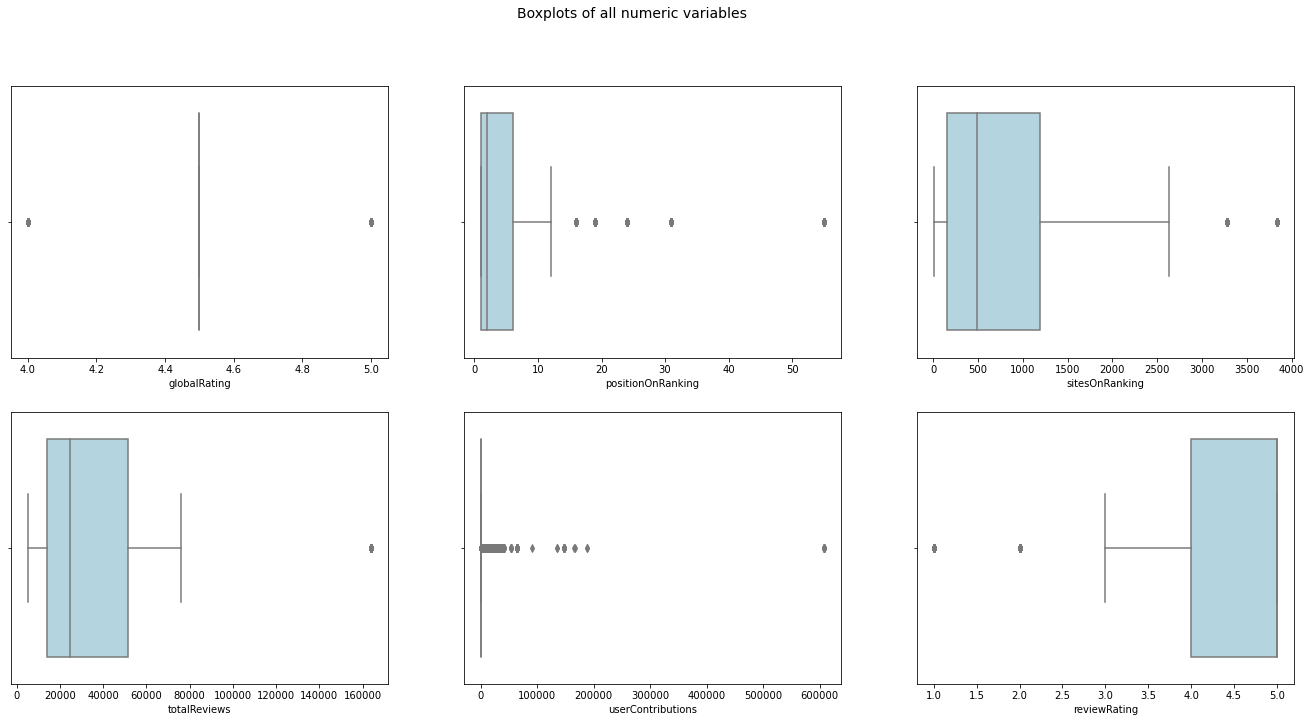

In [65]:
numerical=dseurotop_prep2.select_dtypes(include = [np.number]).columns.tolist()

fig, ax = plt.subplots(2, 3, figsize = (23,11))
for var, subplot in zip(dseurotop_prep2[numerical], ax.flatten()):
    g = sns.boxplot(data = dseurotop_prep2,
                 x = var,
                 color = 'lightblue',
                 ax = subplot)

plt.rc('axes', labelsize = subPlots_label_fontSize)
fig.suptitle("Boxplots of all numeric variables", fontsize=plots_Title_fontSize);

Just as we thought, with the help of the boxplots we can see that the already mentioned variables have some outliers that we need to look and handle closely.
Also, although it seems that we have some outliers in globalRating and reviewRating, we will not treat them as such, for they are rating variables.

Position on Ranking

Although it seems that we have some outliers in globalRating and reviewRating, we will not treat them as such, for they are rating variables.

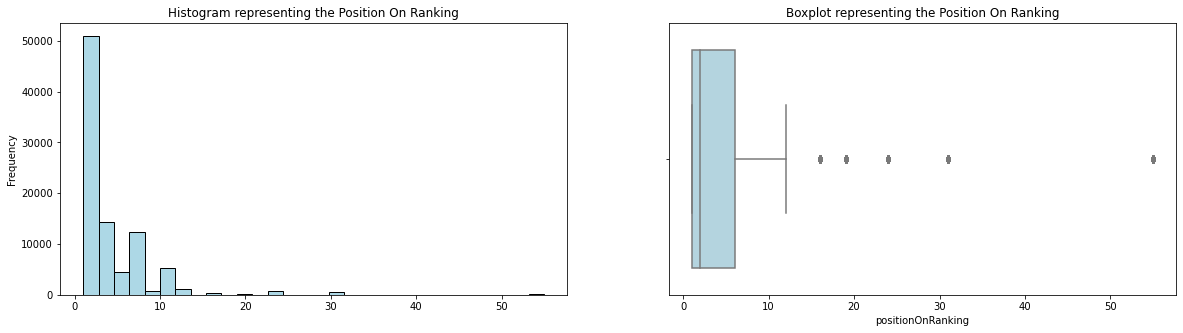

2116

In [66]:
#positionOnRanking
dseurotop_outliers = dseurotop_prep2.copy()

Q1_positionOnRanking = dseurotop_outliers["positionOnRanking"].quantile(0.25)
Q3_positionOnRanking = dseurotop_outliers["positionOnRanking"].quantile(0.75)

IQR_positionOnRanking = Q3_positionOnRanking - Q1_positionOnRanking

Lower_positionOnRanking = Q1_positionOnRanking - (1.5 * IQR_positionOnRanking)
Upper_positionOnRanking = Q3_positionOnRanking + (1.5 * IQR_positionOnRanking)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=dseurotop_outliers["positionOnRanking"], data=dseurotop_outliers, color = 'lightblue',ax = ax[1])
dseurotop_outliers["positionOnRanking"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'Position On Ranking', 
                      color = 'lightblue',
                      ec = 'black', ax=ax[0])

ax[1].title.set_text('Boxplot representing the Position On Ranking')
ax[0].title.set_text('Histogram representing the Position On Ranking')

plt.show()

#positionOnRanking OUTLIERS SHAPE
positionOnRanking_shape = dseurotop_outliers[['positionOnRanking']]
positionOnRanking_shape = positionOnRanking_shape.sort_values(by=['positionOnRanking'], ascending=False)

UC = positionOnRanking_shape.loc[positionOnRanking_shape['positionOnRanking']>Upper_positionOnRanking].shape[0]
UC

It seems we have some outliers but for now we'll just take any value > than 33 before the biggest gap.

In [67]:
outliers = dseurotop_prep2[(dseurotop_prep2.positionOnRanking > 33)].copy()
dseurotop_prep2 = dseurotop_prep2[(dseurotop_prep2.positionOnRanking < 33) | (dseurotop_prep2.positionOnRanking.isnull())]

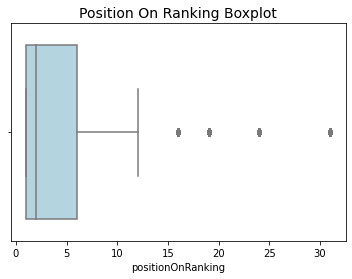

In [68]:
sns.boxplot(x = 'positionOnRanking', data = dseurotop_prep2, color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("Position On Ranking Boxplot", fontsize=plots_Title_fontSize);

In [69]:
print("We deleted " + str(91410 - dseurotop_prep2.shape[0]) + " observations from the dseurotop dataset, that is " + str(((91410 - dseurotop_prep2.shape[0])/91410)*100) + "% of the total observations.")

We deleted 160 observations from the dseurotop dataset, that is 0.17503555409692592% of the total observations.


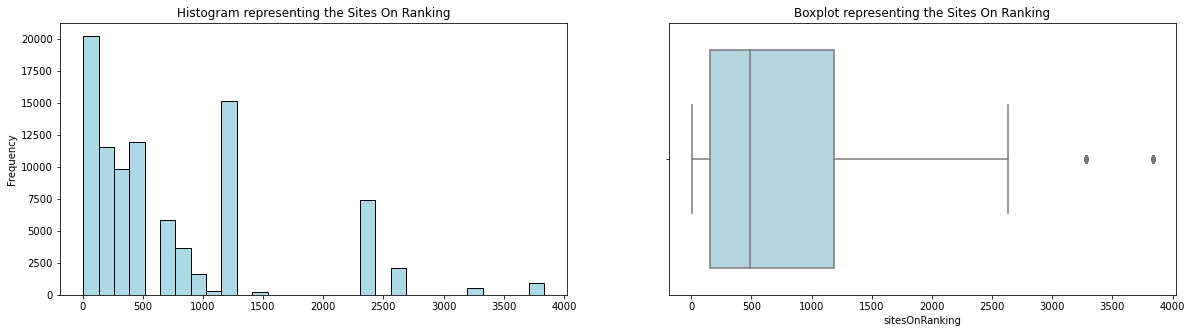

1452

In [70]:
#sitesOnRanking
dseurotop_outliers = dseurotop_prep2.copy()

Q1_sitesOnRanking = dseurotop_outliers["sitesOnRanking"].quantile(0.25)
Q3_sitesOnRanking = dseurotop_outliers["sitesOnRanking"].quantile(0.75)

IQR_sitesOnRanking = Q3_sitesOnRanking - Q1_sitesOnRanking

Lower_sitesOnRanking = Q1_sitesOnRanking - (1.5 * IQR_sitesOnRanking)
Upper_sitesOnRanking = Q3_sitesOnRanking + (1.5 * IQR_sitesOnRanking)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=dseurotop_outliers["sitesOnRanking"], data=dseurotop_outliers, color = 'lightblue',ax = ax[1])
dseurotop_outliers["sitesOnRanking"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'Sites On Ranking', 
                      color = 'lightblue',
                      ec = 'black', ax=ax[0])

ax[1].title.set_text('Boxplot representing the Sites On Ranking')
ax[0].title.set_text('Histogram representing the Sites On Ranking')

plt.show()

#sitesOnRanking OUTLIERS SHAPE
sitesOnRanking_shape = dseurotop_outliers[['sitesOnRanking']]
sitesOnRanking_shape = sitesOnRanking_shape.sort_values(by=['sitesOnRanking'], ascending=False)

UC = sitesOnRanking_shape.loc[sitesOnRanking_shape['sitesOnRanking']>Upper_sitesOnRanking].shape[0]
UC

Sites on Ranking- We see that we have two outliers, so we will remove them and check how many observations we are deleting taking into consideration the dataset size.

In [71]:
outliers = dseurotop_prep2[(dseurotop_prep2.sitesOnRanking > 3200)].copy()
dseurotop_prep2 = dseurotop_prep2[(dseurotop_prep2.sitesOnRanking < 3200) | (dseurotop_prep2.sitesOnRanking.isnull())]

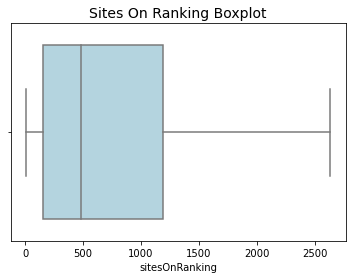

In [72]:
sns.boxplot(x = 'sitesOnRanking', data = dseurotop_prep2, color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("Sites On Ranking Boxplot", fontsize=plots_Title_fontSize);

In [73]:
print("We deleted " + str(91410 - dseurotop_prep2.shape[0]) + " observations from the dseurotop dataset, that is " + str(((91410 - dseurotop_prep2.shape[0])/91410)*100) + "% of the total observations.")

We deleted 1612 observations from the dseurotop dataset, that is 1.7634832075265288% of the total observations.


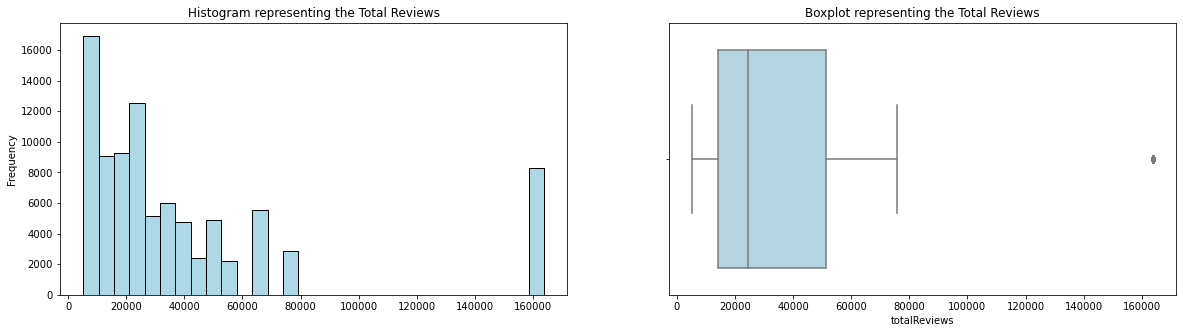

8257

In [74]:
#totalReviews
dseurotop_outliers = dseurotop_prep2.copy()

Q1_totalReviews = dseurotop_outliers["totalReviews"].quantile(0.25)
Q3_totalReviews = dseurotop_outliers["totalReviews"].quantile(0.75)

IQR_totalReviews = Q3_totalReviews - Q1_totalReviews

Lower_totalReviews = Q1_totalReviews - (1.5 * IQR_totalReviews)
Upper_totalReviews = Q3_totalReviews + (1.5 * IQR_totalReviews)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=dseurotop_outliers["totalReviews"], data=dseurotop_outliers, color = 'lightblue',ax = ax[1])
dseurotop_outliers["totalReviews"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'Total Reviews', 
                      color = 'lightblue',
                      ec = 'black', ax=ax[0])

ax[1].title.set_text('Boxplot representing the Total Reviews')
ax[0].title.set_text('Histogram representing the Total Reviews')

plt.show()

#Total Reviews OUTLIERS SHAPE
totalReviews_shape = dseurotop_outliers[['totalReviews']]
totalReviews_shape = totalReviews_shape.sort_values(by=['totalReviews'], ascending=False)

UC = totalReviews_shape.loc[totalReviews_shape['totalReviews']>Upper_totalReviews].shape[0]
UC

As we understand the total reviews per city, and the one showed as an outliers is the first one on the ranking of visits so after some discussion we have decided to keep this outlier.



As we understand the total reviews per city, and the one showed as an outliers is the first one on the ranking of visits, we have decided to keep the lines.

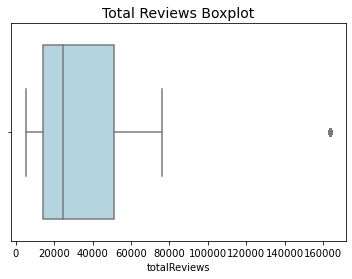

In [75]:
sns.boxplot(x = 'totalReviews', data = dseurotop, color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("Total Reviews Boxplot", fontsize=plots_Title_fontSize);

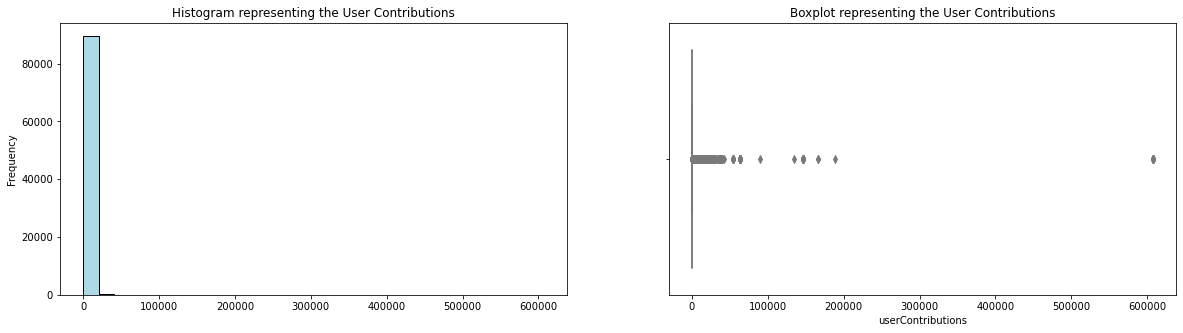

11021

In [76]:
#User contributions
dseurotop_outliers = dseurotop_prep2.copy()

Q1_userContributions = dseurotop_outliers["userContributions"].quantile(0.25)
Q3_userContributions = dseurotop_outliers["userContributions"].quantile(0.75)

IQR_userContributions = Q3_userContributions - Q1_userContributions

Lower_userContributions = Q1_userContributions - (1.5 * IQR_userContributions)
Upper_userContributions = Q3_userContributions + (1.5 * IQR_userContributions)


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(x=dseurotop_outliers["userContributions"], data=dseurotop_outliers, color = 'lightblue',ax = ax[1])
dseurotop_outliers["userContributions"].plot(kind = 'hist', 
                      bins = 30, 
                      title = 'User Contributions', 
                      color = 'lightblue',
                      ec = 'black', ax=ax[0])

ax[1].title.set_text('Boxplot representing the User Contributions')
ax[0].title.set_text('Histogram representing the User Contributions')

plt.show()

#User Contributions OUTLIERS SHAPE
userContributions_shape = dseurotop_outliers[['userContributions']]
userContributions_shape = userContributions_shape.sort_values(by=['userContributions'], ascending=False)

UC = userContributions_shape.loc[userContributions_shape['userContributions']>Upper_userContributions].shape[0]
UC

In [77]:
outliers = dseurotop_prep2[(dseurotop_prep2.userContributions > 20000)].copy()
dseurotop_prep2 = dseurotop_prep2[(dseurotop_prep2.userContributions < 20000) | (dseurotop_prep2.userContributions.isnull())]

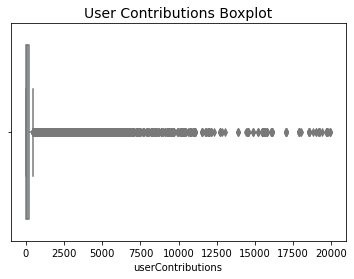

In [78]:
sns.boxplot(x = 'userContributions', data = dseurotop_prep2, color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("User Contributions Boxplot", fontsize=plots_Title_fontSize);

In [79]:
print("We deleted " + str(91410 - dseurotop_prep2.shape[0]) + " observations from the dseurotop dataset, that is " + str(((91410 - dseurotop_prep2.shape[0])/91410)*100) + "% of the total observations.")

We deleted 1805 observations from the dseurotop dataset, that is 1.974619844655946% of the total observations.


In [80]:
dseurotop_prep2.kurt().median()

5.273814972094528

<a class="anchor" id="sk">

### 3.2.5 Skewness And Kurtosis

In [81]:
dseurotop_prep2.skew()

globalRating        -0.384386
positionOnRanking    3.021570
sitesOnRanking       1.353148
totalReviews         2.006781
userContributions    9.791671
reviewRating        -2.316522
dtype: float64

Skew = 0 - Normal Distribution;
Skew < 0 - Negative/Left Skewness -  if we have outliers they will most likely be on the left side and the right side will have more observations;
Skew > 0 - Positive/Right Skewness - if we have outliers they will most likely be on the right side and the left side will have more observations.

By looking at the histograms we can now have a sense of the distribution of the variables, to consolidate that knowledge will be analyzed with the variable's skewness and kurtosis.

Text(0.5, 1.0, 'Global Rating Distribution')

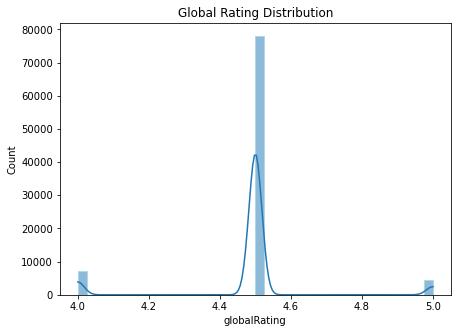

In [82]:
figure = plt.figure(figsize=(7,5))
sns.histplot(dseurotop_prep2["globalRating"], bins=40, ec='lightblue', kde=True)
plt.title('Global Rating Distribution')

Text(0.5, 1.0, 'totalReviews Distribution')

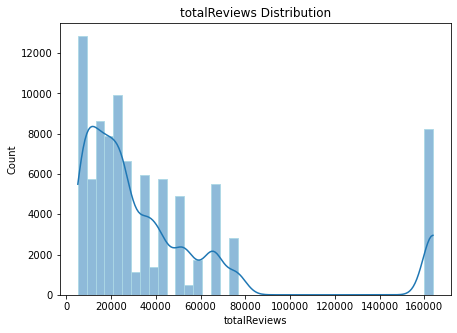

In [83]:
# Example of Skewness / totalReviews 2.034448

figure = plt.figure(figsize=(7,5))
sns.histplot(dseurotop_prep2["totalReviews"], bins=40, ec='lightblue', kde=True)
plt.title('totalReviews Distribution')

Text(0.5, 1.0, 'sitesOnRanking Distribution')

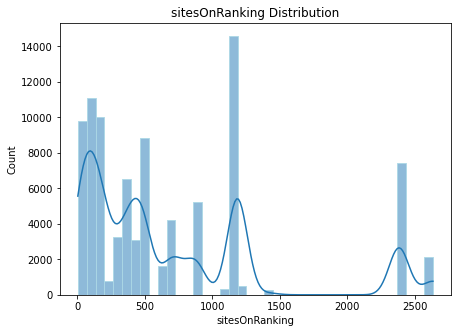

In [84]:
# Example of Skewness / sitesOnRanking 1.566013

figure = plt.figure(figsize=(7,5))
sns.histplot(dseurotop_prep2["sitesOnRanking"], bins=40, ec='lightblue', kde=True)
plt.title('sitesOnRanking Distribution')

Text(0.5, 1.0, 'positionOnRanking Distribution')

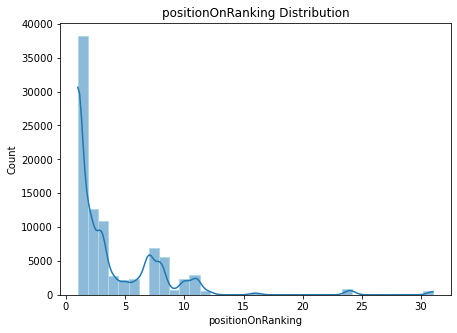

In [85]:
# Example of Skewness / positionOnRanking 4.096109

figure = plt.figure(figsize=(7,5))
sns.histplot(dseurotop_prep2["positionOnRanking"], bins=35, ec='lightblue', kde=True)
plt.title('positionOnRanking Distribution')

In [86]:
dseurotop_prep2.skew().mean()

2.2453769892457163

In [87]:
dseurotop_prep2.kurt()

globalRating           4.672097
positionOnRanking     13.319288
sitesOnRanking         0.972666
totalReviews           3.121359
userContributions    130.164182
reviewRating           5.875533
dtype: float64

In [88]:
dseurotop_prep2.kurt().mean()

26.354187410215356

Kurtosis measures extreme values in both tails, large kurtosis indicates that tail data exceeds the tails of the normal distribution making room for more outliers. 

- In this dataset we can see that unless the variable userContributions the other ones has small Kurtosis.

We will apply the cube root transformation to all the variables except for the rating variables (since we tried and concluded that this would represent a negative impact in the overall analysis), because we can see they all have a high positive skewness. We want to achieve the closest to a gaussian distribution as we can for our statistics and analysis.

In [89]:
dseurotop_prep2['userContributions_tr'] = np.cbrt(dseurotop_prep2['userContributions'])

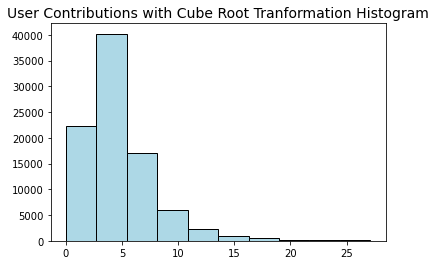

In [90]:
plt.hist(dseurotop_prep2['userContributions_tr'], edgecolor='black', color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("User Contributions with Cube Root Tranformation Histogram", fontsize=plots_Title_fontSize);

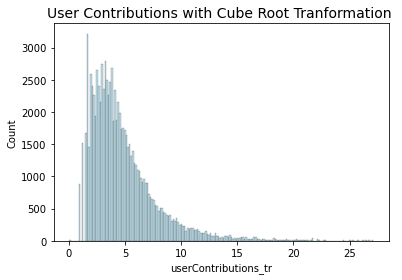

In [91]:
sns.histplot(dseurotop_prep2['userContributions_tr'], color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("User Contributions with Cube Root Tranformation ", fontsize=plots_Title_fontSize);

In [92]:
dseurotop_prep2['positionOnRanking_tr'] = np.cbrt(dseurotop_prep2['positionOnRanking'])

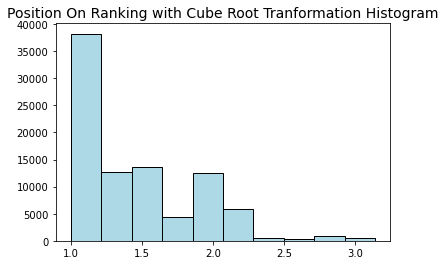

In [93]:
plt.hist(dseurotop_prep2['positionOnRanking_tr'], edgecolor='black', color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("Position On Ranking with Cube Root Tranformation Histogram", fontsize=plots_Title_fontSize);

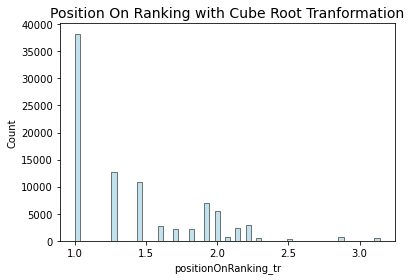

In [94]:
sns.histplot(dseurotop_prep2['positionOnRanking_tr'], color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("Position On Ranking with Cube Root Tranformation", fontsize=plots_Title_fontSize);

In [95]:
dseurotop_prep2['totalReviews_tr'] = np.cbrt(dseurotop_prep2['totalReviews'])

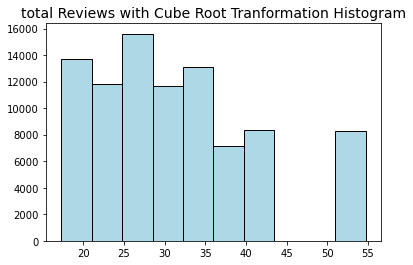

In [96]:

plt.hist(dseurotop_prep2['totalReviews_tr'], edgecolor='black', color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("total Reviews with Cube Root Tranformation Histogram", fontsize=plots_Title_fontSize);

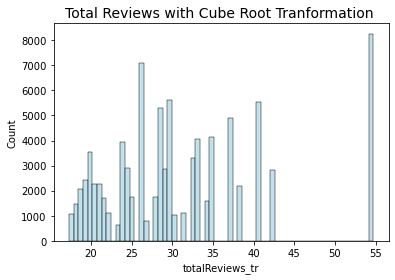

In [97]:
sns.histplot(dseurotop_prep2['totalReviews_tr'], color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("Total Reviews with Cube Root Tranformation ", fontsize=plots_Title_fontSize);

In [98]:
dseurotop_prep2['sitesOnRanking_tr'] = np.cbrt(dseurotop_prep2['sitesOnRanking'])

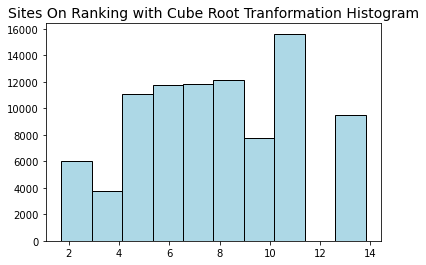

In [99]:

plt.hist(dseurotop_prep2['sitesOnRanking_tr'], edgecolor='black', color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("Sites On Ranking with Cube Root Tranformation Histogram", fontsize=plots_Title_fontSize);

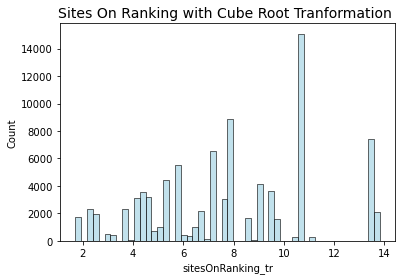

In [100]:
sns.histplot(dseurotop_prep2['sitesOnRanking_tr'], color = 'lightblue')

plt.rc('axes', labelsize = subPlots_label_fontSize)
plt.title("Sites On Ranking with Cube Root Tranformation ", fontsize=plots_Title_fontSize);

<a class="anchor" id="cc">

### 3.2.6. Check Correlations

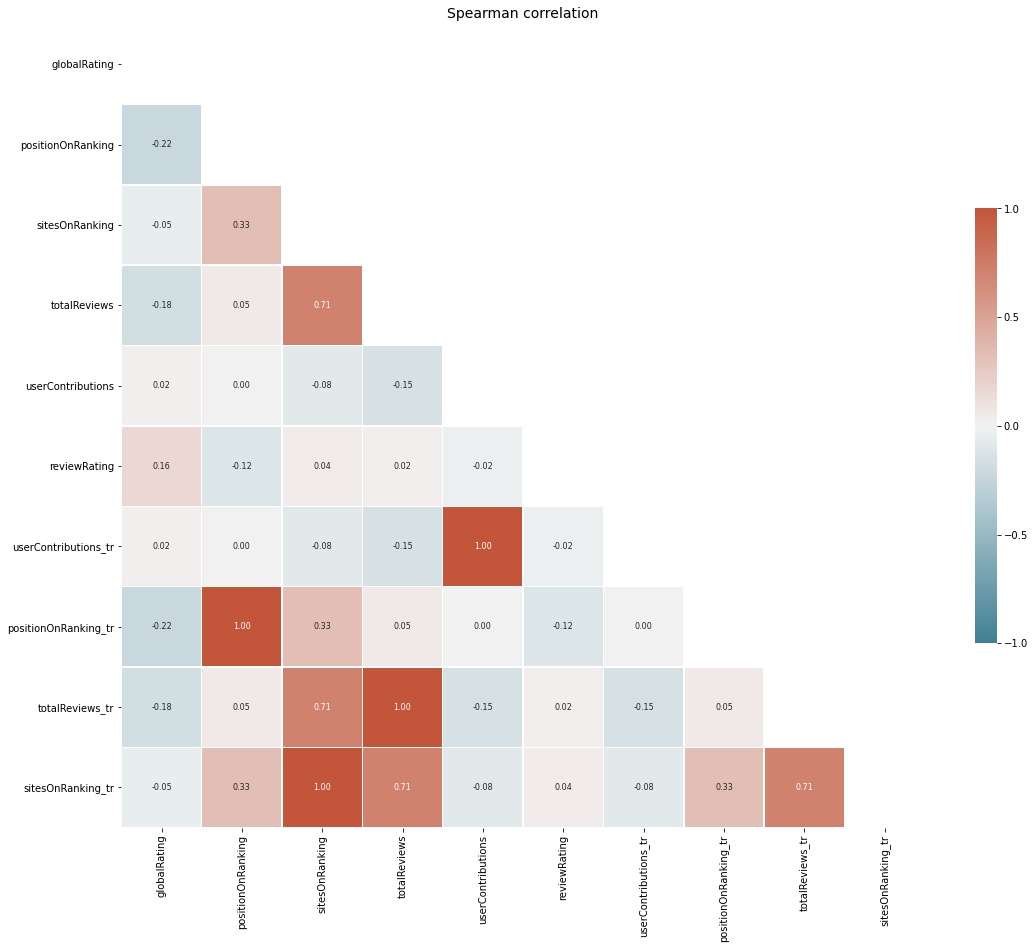

In [101]:
#Create correlation matrix
corr = dseurotop_prep2.corr(method = 'spearman')
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

#Draw
cmap = sns.diverging_palette(220, 20, as_cmap = True) #aqui da para mudar a cor
fig , ax = plt.subplots(figsize = (18, 20))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = cmap,
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt = '.2f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize})

#Decoration
plt.title("Spearman correlation", fontsize = plots_Title_fontSize)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 90)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

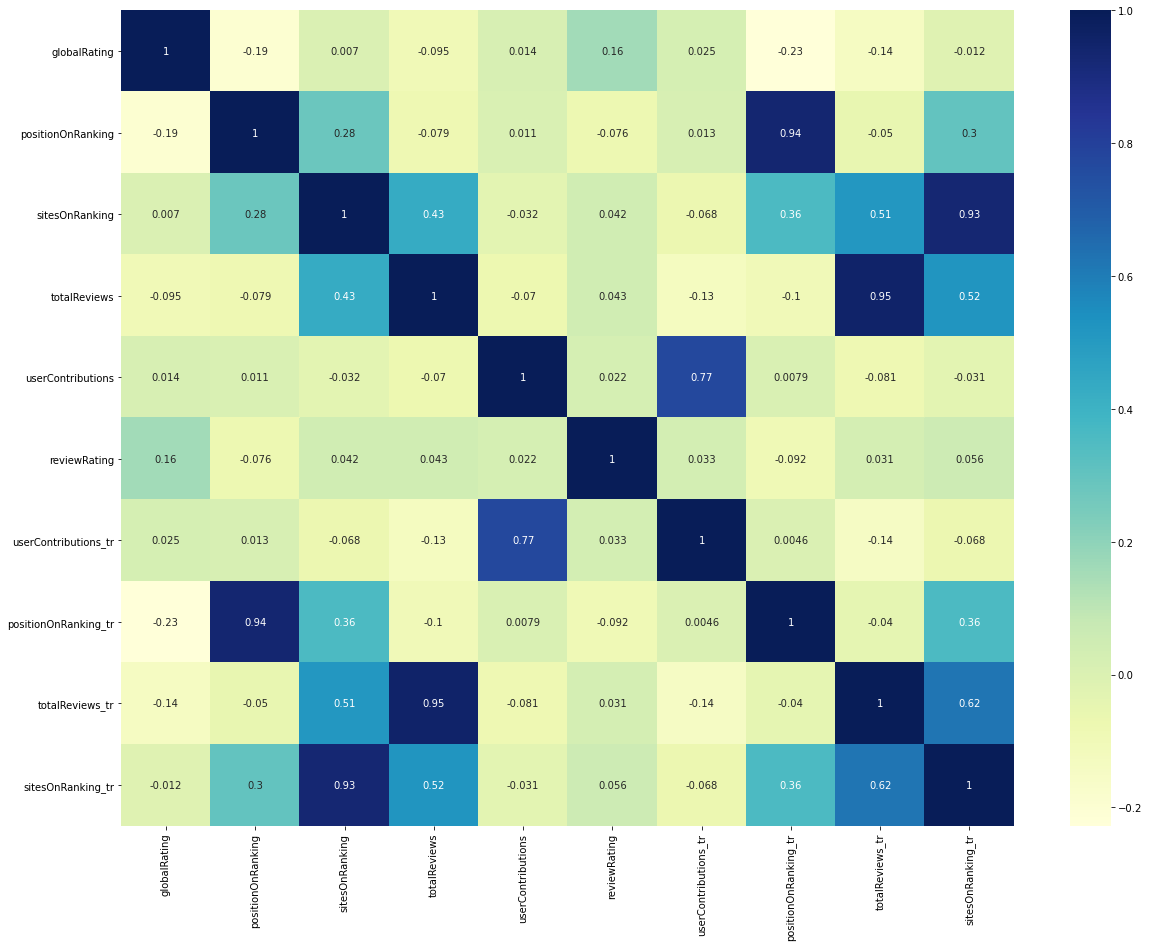

In [102]:
#Identify Correlations

dseurotop_corr = dseurotop_prep2.copy()
corr = dseurotop_corr.corr()

figure = plt.figure(figsize=(20,15))
heatmap1=sns.heatmap(data = corr, annot = True, cmap="YlGnBu")
plt.show()

<a class="anchor" id="fe">

# 4. Feature Engineering

- Check coherence on the dataset;
- Make transformations to the dataset;

<a class="anchor" id="cv">

## 4.1. Changing Variables

In [103]:
#split countries and cities

dseurotop_prep2['userLocation'] = dseurotop_prep2['userLocation'].astype(str)

In [104]:
dseurotop_prep2['userLocation'].value_counts()

Unknown                 13149
London, UK               3613
Melbourne, Australia      752
Sydney, Australia         696
New York City, NY         677
                        ...  
Emersons Green, UK          1
Kalaheo                     1
East Mids, UK               1
Cohoes, NY                  1
Bad Aibling, Germany        1
Name: userLocation, Length: 12440, dtype: int64

In [105]:
dseurotop_prep2['userLocation'][0].split(', ')

['Indianapolis', 'IN']

In [106]:
field1 = []
field2 = []

for i in range(dseurotop_prep2.shape[0]):
    a = dseurotop_prep2['userLocation'][i].split(', ')
    field1.append(a[0])
    if len(a)>1:
        field2.append(a[1])
    else: 
        field2.append('Unknown')

In [107]:
dseurotop_prep2['userCity'] = field1

In [108]:
dseurotop_prep2['userCountry'] = field2

In [109]:
dseurotop_prep2.head(5)

,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,...,reviewFullText,Name,Country,ISO,userContributions_tr,positionOnRanking_tr,totalReviews_tr,sitesOnRanking_tr,userCity,userCountry
localID,,,,,,,,,,,,,,,,,,,,,
MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,...,"Absolutely breathtaking use of light, an amazi...",Basilica of the Sagrada Familia,Spain,ES,3.072317,1.0,54.717894,10.585098,Indianapolis,IN
MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,...,A really interesting and beautiful place to vi...,Basilica of the Sagrada Familia,Spain,ES,1.912931,1.0,54.717894,10.585098,Bandon,Ireland
MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,...,Beautiful place and must visit place in barcel...,Basilica of the Sagrada Familia,Spain,ES,6.447306,1.0,54.717894,10.585098,Valencia,Spain
MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,Unknown,7,Other,2021-08-16,...,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES,1.912931,1.0,54.717894,10.585098,Unknown,Unknown
MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,...,I visited about 20 years ago and there has bee...,Basilica of the Sagrada Familia,Spain,ES,8.020779,1.0,54.717894,10.585098,Madrid,Spain


In [110]:
dseurotop_prep2['Covid time'] = dseurotop_prep2['reviewVisited'] > '01-03-2020'

In [111]:
# Create column indicating "before covid" / "after covid"
def Covid_time(dseurotop_prep2):
    if dseurotop_prep2['Covid time'] == False:
           return "Before_Covid"
    else:
           return "After_Covid"
dseurotop_prep2['Covid_time'] = dseurotop_prep2.apply(Covid_time, axis=1)

In [112]:
dseurotop_prep2.head()

,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,...,Country,ISO,userContributions_tr,positionOnRanking_tr,totalReviews_tr,sitesOnRanking_tr,userCity,userCountry,Covid time,Covid_time
localID,,,,,,,,,,,,,,,,,,,,,
MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,...,Spain,ES,3.072317,1.0,54.717894,10.585098,Indianapolis,IN,True,After_Covid
MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,...,Spain,ES,1.912931,1.0,54.717894,10.585098,Bandon,Ireland,True,After_Covid
MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,...,Spain,ES,6.447306,1.0,54.717894,10.585098,Valencia,Spain,True,After_Covid
MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,Unknown,7,Other,2021-08-16,...,Spain,ES,1.912931,1.0,54.717894,10.585098,Unknown,Unknown,True,After_Covid
MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,...,Spain,ES,8.020779,1.0,54.717894,10.585098,Madrid,Spain,True,After_Covid


In [113]:
#transform the userCountry values in uppercase

dseurotop_prep2['userCountry'] = dseurotop_prep2['userCountry'].str.upper()

In [114]:
#eliminate spaces from strings

dseurotop_prep2['userCountry']=dseurotop_prep2['userCountry'].str.strip()

In [122]:
#delete characters

dseurotop_prep2['userCountry']=dseurotop_prep2['userCountry'].replace('.','')

In [123]:
pd.set_option('display.max_rows', None)

In [124]:
#list states/cities

brazil = ['Brasil', 'AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
canada = ['ONTARIO /CANADA', 'PE', 'NS', 'NB', 'QC', 'ON', 'MB', 'SK', 'AB', 'BC', 'YT', 'NT', 'NU', 'NEWFOUNDLAND AND LABRADOR', 'PRINCE EDWARD ISLAND', 'NOVA SCOTIA', 'NEW BRUNSWICK', 'QUEBEC', 'ONTARIO', 'MANITOBA', 'SASKATCHEWAN', 'ALBERTA', 'BRITISH COLUMBIA', 'YUKON', 'NORTHWEST TERRITORIES', 'NUNAVUT', 'BASHKORTOSTAN']
usa = ['U.S.A', 'U.S.A.', 'UNITED STATES', 'TX   USA', 'OH USA', 'MASS', 'N CAROLINA', 'MONTANA USA', 'MARIANA ISLANDS', 'DELAWARE USA', 'CO USA', 'D.C','D.C.', 'CO. USA', 'USA', 'AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT','VT', 'VA', 'VI', 'WA', 'WV', 'WI', 'WY', 'ALABAMA', 'ALASKA', 'AMERICAN SAMOA', 'ARIZONA', 'ARKANSAS', 'BERKS', 'CAROLINE DU NORD', 'CALIFORNIA', 'CALLIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'COLUMBIA', 'FLORIDA', 'GEORGIA', 'GUAM', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NUEVA YORK', 'NORTH CAROLINA', 'N. CAROLINA', 'NORTH DAKOTA', 'NORTHERN MARIANA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', "TEXAS YA'LL", 'UTAH', 'VERMONT', 'VIRGINIA', 'VIRGIN ISLANDS', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING']
netherlands = ['NL', 'UTRECHT', 'LIMBURG', 'NOORD-HOLLAND', 'UTRECHT']
norway = ['AKERSHUS', 'GÄVLEBORG COUNTY']
newzeland = ['AUCKLAND', 'WELLINGTON']
philippines = ['BACOLOD', 'CEBU CITY']
greece = ['ΕΛΛΆΔΑ', 'ATTIKI']
russia = ['РОССИЯ', 'MOSCOW CITY' ]
uk = ['UNITED KINGDOM', 'WILTSHIRE', 'WEST MIDLANDS', 'WEST YORKS', 'WEST YORKSHIRE', 'WALES', 'WARWICKSHIRE', 'UK & GRASSE', 'SWALES', 'SUFFOLK', 'SURREY', 'SUSSEX', 'STH YORKSHIRE', 'STAFFS', 'SOUTH WALES', 'SOMERSET', 'READING', 'SCOTLAND UK', 'SCOTLAND', 'OXFORDSHIRE', 'OXON', 'POWYS', 'NORTH HUMBERSIDE', 'NORTH WALES', 'NORTHAMPTON', 'MIDDLESEX', 'MIDLETON', 'MERSEYSIDE', 'LINCOLNSHIRE', 'LANCASHIRE','LEICESTERSHIRE', 'KENT', 'GLANNAU MERSI', 'DEVON','DURHAM','ENGLAND', 'ESSEX', 'DORSET', 'UK & GRASSE', 'CO ANTRIM', 'CHESHIRE', 'WEST SUSSEX', 'HERTS', 'HERTFORDSHIRE', 'HERTFORSHIRE', 'SOMERSET', 'BELFAST', 'CAMBRIDGSHIRE', 'HAMPSHIRE']
israel = ['HATZAFON', 'YERUSHALAYIM', 'HAMERKAZ', 'TEL AVIV']
germany = ['DEUTSCHLAND', 'BADEN-WÜRTTEMBERG', 'HESSEN' ]
egipt = ['AL QAHIRAH', '' ]
france = ['NEW CALEDONIA ', 'ALSACE', 'AQUITAINE', 'BRETAGNE', 'ILE-DE-FRANCE', 'LIMOUSIN']
turkey = ['ANKARA', 'MUGLA PROVINCE']
australia = ['AUSTRALIA', 'WESTERN AUSTRALIA', 'TASMANIA', 'VICTORIA', 'SYDNEY', 'AUSTRALIAN CAPITAL TERRITORY', 'NEW SOUTH WALES', 'NSW', 'QLD', 'QUEENSLAND', 'SOUTH AUSTRALIA']
italy = ['VENETO', 'CAMPANIA', 'EMILIA-ROMAGNA', 'ITALIA', 'MARCHE', 'SICILY', 'VENETO']
mexico = ['STATE OF MEXICO']
portugal = ['AVEIRO', 'LISBOA']
romania = ['BRASOV', 'BUCURESTI', 'PRAHOVA']
spain = ['CANARIAS']
ireland = ['DUBLIN', 'COUNTY WATERFORD', 'WEXFORD']
denmark = ['FYN']
southafrica = ['GAUTENG', 'WESTERN CAPE']
caribbean = ['GRAND CAYMAN', 'STVINCENT', 'CAYMAN ISLANDS', 'GRENADA', 'GUADELOUPE', 'NEW PROVIDENCE ISLAND', 'ST MARTIN / ST MAARTEN', 'ST VINCENT']
ghana = ['GREATER ACCRA']
ecuador = ['GUAYAS', 'ISABELA']
indonesia = ['JAKARTA RAYA']
india = ['MAHARASHTRA', 'WEST BENGAL']
taiwan = ['NEW TAIPEI', 'TAIWAN', 'TAIPEI']
malaysia = ['SELANGOR', 'WILAYAH PERSEKUTUAN']
sweden = ['SVERIGE']
tobago = ['TOBAGO', 'TRINIDAD']
uae = ['UNITED ARAB EMIRATES', 'UNI EMIRAT ARAB']
switzerland = ['ZUG']
venezuela = ['CARONI']
argentina = ['CIUDAD AUTÓNOMA DE BUENOS AIRES']
tanzania = ['DAR ES SALAAM']


In [125]:
#renaming userCountry to United States

for i in range(dseurotop_prep2.shape[0]):
    if dseurotop_prep2['userCountry'][i] in usa:
        dseurotop_prep2['userCountry'][i] = 'USA'
    if dseurotop_prep2['userCountry'][i] in canada:
        dseurotop_prep2['userCountry'][i] = 'CANADA'
    if dseurotop_prep2['userCountry'][i] in uk:
        dseurotop_prep2['userCountry'][i] = 'UK'
    if dseurotop_prep2['userCountry'][i] in brazil:
        dseurotop_prep2['userCountry'][i] = 'BRAZIL'
    if dseurotop_prep2['userCountry'][i] in netherlands:
        dseurotop_prep2['userCountry'][i] = 'NETHERLANDS'
    if dseurotop_prep2['userCountry'][i] in newzeland:
        dseurotop_prep2['userCountry'][i] = 'NEW ZELAND'
    if dseurotop_prep2['userCountry'][i] in norway:
        dseurotop_prep2['userCountry'][i] = 'NORWAY'
    if dseurotop_prep2['userCountry'][i] in philippines:
        dseurotop_prep2['userCountry'][i] = 'PHILIPPINES'
    if dseurotop_prep2['userCountry'][i] in greece:
        dseurotop_prep2['userCountry'][i] = 'GREECE'
    if dseurotop_prep2['userCountry'][i] in russia:
        dseurotop_prep2['userCountry'][i] = 'RUSSIA'
    if dseurotop_prep2['userCountry'][i] in israel:
        dseurotop_prep2['userCountry'][i] = 'ISRAEL'
    if dseurotop_prep2['userCountry'][i] in germany:
        dseurotop_prep2['userCountry'][i] = 'GERMANY'
    if dseurotop_prep2['userCountry'][i] in egipt:
        dseurotop_prep2['userCountry'][i] = 'EGIPT'
    if dseurotop_prep2['userCountry'][i] in france:
        dseurotop_prep2['userCountry'][i] = 'FRANCE'
    if dseurotop_prep2['userCountry'][i] in turkey:
        dseurotop_prep2['userCountry'][i] = 'TURKEY'
    if dseurotop_prep2['userCountry'][i] in australia:
        dseurotop_prep2['userCountry'][i] = 'AUSTRALIA'
    if dseurotop_prep2['userCountry'][i] in italy:
        dseurotop_prep2['userCountry'][i] = 'ITALY'
    if dseurotop_prep2['userCountry'][i] in mexico:
        dseurotop_prep2['userCountry'][i] = 'MEXICO'
    if dseurotop_prep2['userCountry'][i] in portugal:
        dseurotop_prep2['userCountry'][i] = 'PORTUGAL'
    if dseurotop_prep2['userCountry'][i] in romania:
        dseurotop_prep2['userCountry'][i] = 'ROMANIA'
    if dseurotop_prep2['userCountry'][i] in spain:
        dseurotop_prep2['userCountry'][i] = 'SPAIN'    
    if dseurotop_prep2['userCountry'][i] in ireland:
        dseurotop_prep2['userCountry'][i] = 'IRELAND'     
    if dseurotop_prep2['userCountry'][i] in denmark:
        dseurotop_prep2['userCountry'][i] = 'DENMARK'
    if dseurotop_prep2['userCountry'][i] in southafrica:
        dseurotop_prep2['userCountry'][i] = 'SOUTH AFRICA'
    if dseurotop_prep2['userCountry'][i] in caribbean:
        dseurotop_prep2['userCountry'][i] = 'CARIBBEAN'
    if dseurotop_prep2['userCountry'][i] in ghana:
        dseurotop_prep2['userCountry'][i] = 'GHANA'
    if dseurotop_prep2['userCountry'][i] in ecuador:
        dseurotop_prep2['userCountry'][i] = 'ECUADOR'    
    if dseurotop_prep2['userCountry'][i] in indonesia:
        dseurotop_prep2['userCountry'][i] = 'INDONESIA'        
    if dseurotop_prep2['userCountry'][i] in india:
        dseurotop_prep2['userCountry'][i] = 'INDIA'    
    if dseurotop_prep2['userCountry'][i] in taiwan:
        dseurotop_prep2['userCountry'][i] = 'TAIWAN'
    if dseurotop_prep2['userCountry'][i] in malaysia:
        dseurotop_prep2['userCountry'][i] = 'MALAYSIA'
    if dseurotop_prep2['userCountry'][i] in sweden:
        dseurotop_prep2['userCountry'][i] = 'SWEDEN'
    if dseurotop_prep2['userCountry'][i] in tobago:
        dseurotop_prep2['userCountry'][i] = 'TOBAGO'
    if dseurotop_prep2['userCountry'][i] in uae:
        dseurotop_prep2['userCountry'][i] = 'UAE'
    if dseurotop_prep2['userCountry'][i] in switzerland:
        dseurotop_prep2['userCountry'][i] = 'SWITZERLAND'
    if dseurotop_prep2['userCountry'][i] in venezuela:
        dseurotop_prep2['userCountry'][i] = 'VENEZUELA'
    if dseurotop_prep2['userCountry'][i] in argentina:
        dseurotop_prep2['userCountry'][i] = 'ARGENTINA'
    if dseurotop_prep2['userCountry'][i] in tanzania:
        dseurotop_prep2['userCountry'][i] = 'TANZANIA'

<ipython-input-125-2f5caca7b24d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dseurotop_prep2['userCountry'][i] = 'USA'
<ipython-input-125-2f5caca7b24d>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dseurotop_prep2['userCountry'][i] = 'AUSTRALIA'
<ipython-input-125-2f5caca7b24d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dseurotop_prep2['userCountry'][i] = 'BRAZIL'
<ipython-input-125-2f5caca7b24d>:9: SettingWithCopyWarni

In [126]:
# Create new variable to check when the customer visited the attraction. 
#Starting with identifying the month of the visit
#Then change for the season

dseurotop_prep2["seasonVisited"] = dseurotop_prep2['reviewVisited'].dt.month_name()

dseurotop_prep2.head()

,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,...,ISO,userContributions_tr,positionOnRanking_tr,totalReviews_tr,sitesOnRanking_tr,userCity,userCountry,Covid time,Covid_time,seasonVisited
localID,,,,,,,,,,,,,,,,,,,,,
MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,...,ES,3.072317,1.0,54.717894,10.585098,Indianapolis,USA,True,After_Covid,August
MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,...,ES,1.912931,1.0,54.717894,10.585098,Bandon,IRELAND,True,After_Covid,March
MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,...,ES,6.447306,1.0,54.717894,10.585098,Valencia,SPAIN,True,After_Covid,August
MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,Unknown,7,Other,2021-08-16,...,ES,1.912931,1.0,54.717894,10.585098,Unknown,UNKNOWN,True,After_Covid,July
MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,...,ES,8.020779,1.0,54.717894,10.585098,Madrid,SPAIN,True,After_Covid,July


In [127]:
#Create a list of Seasons

summer = ['June', 'July', 'August', 'September']
winter = ['January', 'February', 'December']
autumn = ['October', 'November']
spring = ['March', 'April', 'May']

In [128]:
# renaming monthVisited

for i in range(dseurotop_prep2.shape[0]):
    if dseurotop_prep2['seasonVisited'][i] in summer:
        dseurotop_prep2['seasonVisited'][i] = 'Summer'
    if dseurotop_prep2['seasonVisited'][i] in winter:
        dseurotop_prep2['seasonVisited'][i] = 'Winter'
    if dseurotop_prep2['seasonVisited'][i] in autumn:
        dseurotop_prep2['seasonVisited'][i] = 'Autumn'
    if dseurotop_prep2['seasonVisited'][i] in spring:
        dseurotop_prep2['seasonVisited'][i] = 'Spring'

<ipython-input-128-23ec59649f55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dseurotop_prep2['seasonVisited'][i] = 'Summer'
<ipython-input-128-23ec59649f55>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dseurotop_prep2['seasonVisited'][i] = 'Spring'
<ipython-input-128-23ec59649f55>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dseurotop_prep2['seasonVisited'][i] = 'Autumn'
<ipython-input-128-23ec59649f55>:7: SettingWithCopy

<a class="anchor" id="m">

# 5. Modeling

<a class="anchor" id="rfm">

## 5.1. RFM Model

In [129]:
#create subset Portugal

dseurotop_portugal = dseurotop_prep2.copy()

dseurotop_portugal = dseurotop_prep2.loc[dseurotop_prep2['Country'] == 'Portugal']

In [130]:
dseurotop_portugal.head(5)

,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,...,ISO,userContributions_tr,positionOnRanking_tr,totalReviews_tr,sitesOnRanking_tr,userCity,userCountry,Covid time,Covid_time,seasonVisited
localID,,,,,,,,,,,,,,,,,,,,,
MAG010,2021-08-20 13:10:44.095,4.0,6,726,36979,Barbs25@Barbs25,"Staffordshire, UK",2273,Friends,2021-08-11,...,PT,13.148205,1.817121,33.315913,8.987637,Staffordshire,UK,True,After_Covid,Summer
MAG010,2021-08-20 13:10:44.126,4.0,6,726,36979,WWH47@WWH47,"Baton Rouge, LA",121,Other,2021-08-02,...,PT,4.946087,1.817121,33.315913,8.987637,Baton Rouge,USA,True,After_Covid,Summer
MAG010,2021-08-20 13:10:44.173,4.0,6,726,36979,Runawayblond@runawayblond,"Chicago, IL",217,Solo,2021-07-26,...,PT,6.009245,1.817121,33.315913,8.987637,Chicago,USA,True,After_Covid,Summer
MAG010,2021-08-20 13:10:44.204,4.0,6,726,36979,Darren H@DarrenHumphrey,"Orlando, FL",298,Other,2021-07-24,...,PT,6.679420,1.817121,33.315913,8.987637,Orlando,USA,True,After_Covid,Summer
MAG010,2021-08-20 13:10:44.257,4.0,6,726,36979,Kevin S@kevins684,"Pontypridd, UK",4550,Other,2021-07-23,...,PT,16.570558,1.817121,33.315913,8.987637,Pontypridd,UK,True,After_Covid,Summer


In [131]:
# Compute totals per customer
dateMax = dseurotop_portugal.reviewWritten.max()
dspt = dseurotop_portugal.groupby(['userCountry']).agg(Recency=('reviewVisited', lambda date: (dateMax - date.max()).days),
                                   Frequency=('userName', lambda i: len(i.unique())),
                                   Ratings=('reviewRating', 'sum')).fillna(0)

array([[<AxesSubplot:title={'center':'Frequency'}>]], dtype=object)

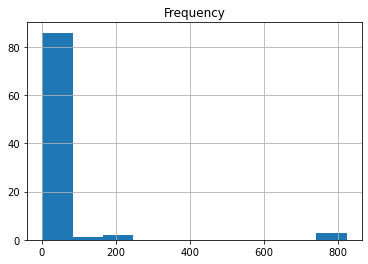

In [132]:
dspt.hist(column='Frequency')

In [133]:
dspt['FrequencyLog'] = np.log(dspt['Frequency'])

array([[<AxesSubplot:title={'center':'FrequencyLog'}>]], dtype=object)

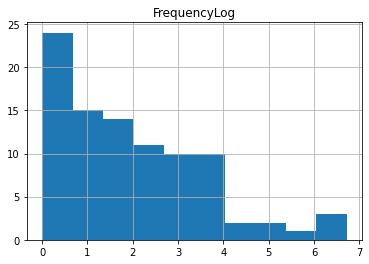

In [134]:
dspt.hist(column='FrequencyLog')

In [135]:
cols = ['Recency','Frequency','Ratings']
table =dspt[cols].describe()
table

,Recency,Frequency,Ratings
count,92.000000,92.000000,92.000000
mean,548.326087,42.902174,266.565217
std,257.298907,146.928484,908.866729
min,18.000000,1.000000,1.000000
25%,383.000000,1.000000,8.750000
50%,596.000000,4.500000,32.500000
75%,718.000000,17.500000,102.000000
max,1022.000000,824.000000,5437.000000


In [136]:
# Calculate RMF scores

# Function
def RFMScore(x, col):
    if x <= dspt.quantile(0.25)[col]:
        return '1'
    elif x <= dspt.quantile(0.5)[col]:
        return '2'
    elif x <= dspt.quantile(0.75)[col]:
        return '3'
    else:
        return '4'

# Process
dspt['RScore'] = dspt['Recency'].apply(RFMScore, col='Recency')
dspt['FScore'] = dspt['Frequency'].apply(RFMScore, col='Frequency')
dspt['MScore'] = dspt['Ratings'].apply(RFMScore, col='Ratings')

In [137]:
# Show first 5
dspt.head(5)

,Recency,Frequency,Ratings,FrequencyLog,RScore,FScore,MScore
userCountry,,,,,,,
ALBANIA,871,2,10,0.693147,4,2,2
ALGERIA,627,1,5,0.000000,3,1,1
ANGOLA,79,1,5,0.000000,1,1,1
ARGENTINA,627,6,26,1.791759,3,3,2
ARMENIA,810,1,5,0.000000,4,1,1


In [138]:
# Create a column with full RMF score and sort the results

# Transform to string
cols = ['RScore','FScore','MScore']
dspt[cols] = dspt[cols].astype(str)

# Concatenate
dspt['RFMScore'] = dspt['RScore'] + dspt['FScore'] + dspt['MScore']

# Sort
dspt = dspt.sort_values(by=['RFMScore'])

In [139]:
# Show first 5
dspt.head(5)

,Recency,Frequency,Ratings,FrequencyLog,RScore,FScore,MScore,RFMScore
userCountry,,,,,,,,
ANGOLA,79,1,5,0.000000,1,1,1,111
VENEZUELA,79,3,25,1.098612,1,2,2,122
JAPAN,79,3,22,1.098612,1,2,2,122
LATVIA,291,6,31,1.791759,1,3,2,132
SWEDEN,49,16,77,2.772589,1,3,3,133


## Evaluation

### General

Now we have our segment "most valued customers" after the RFM analysis, we should explore some patterns with some statistical analysis.

We will try to get some insights amongst those customers, such as the most popular Portuguese attractions, the weight of each trip type, and when they prefer to visit.

In [140]:
# Calculate statistics per RFM segment
RFMStats = dspt.reset_index().groupby(['RFMScore']).agg(nrCountry=('userCountry', lambda i: len(i.unique()) ),
                                                     avgRecency=('Recency', 'mean'),
                                                     avgFrequency=('Frequency', 'mean'),
                                                     avgRatings=('Ratings', 'mean')).fillna(0)

In [141]:
# Show statistics
RFMStats.head(10)

,nrCountry,avgRecency,avgFrequency,avgRatings
RFMScore,,,,
111,1,79.00,1.000000,5.000000
122,2,79.00,3.000000,23.500000
132,1,291.00,6.000000,31.000000
133,4,245.75,12.750000,70.500000
134,1,291.00,16.000000,118.000000
144,15,180.20,216.066667,1334.666667
211,2,550.50,1.000000,3.000000
221,1,596.00,2.000000,8.000000
222,6,570.50,3.166667,19.166667


In [142]:
# Check who are the countries from a specific segment (e.g."144")
dspt[dspt['RFMScore']=='144']

,Recency,Frequency,Ratings,FrequencyLog,RScore,FScore,MScore,RFMScore
userCountry,,,,,,,,
SWITZERLAND,383,21,105,3.044522,1,4,4,144
ITALY,322,41,265,3.713572,1,4,4,144
PORTUGAL,18,176,983,5.170484,1,4,4,144
GREECE,352,30,198,3.401197,1,4,4,144
GERMANY,79,42,259,3.737670,1,4,4,144
FRANCE,18,42,216,3.737670,1,4,4,144
THE NETHERLANDS,322,62,379,4.127134,1,4,4,144
ROMANIA,79,20,159,2.995732,1,4,4,144
USA,18,824,5437,6.714171,1,4,4,144


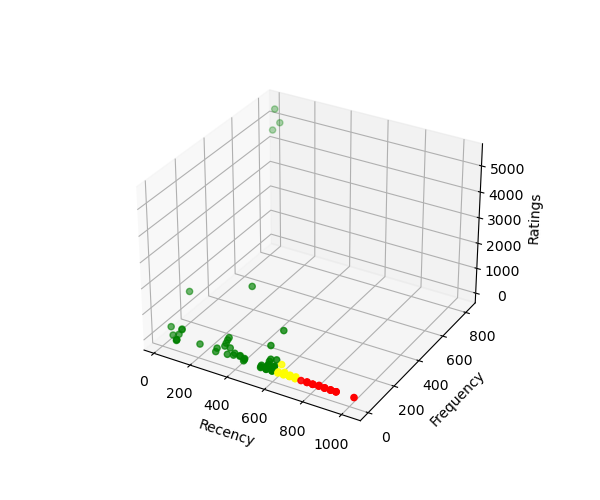

In [143]:
# Interactive 3D scatter plot of each customer's RFM values
%matplotlib widget

# Draw
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection = '3d')

# Decoration
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Ratings")

"""
color = []
for x in dspt['RFMScore']:
    if x[0]<'3':
        color.append('green')
    elif x[0]=='3':
        color.append('yellow')
    else:
        color.append('red')
"""

# Define color according to Recency (1 and 2:Green, 3:Yellow, 4:Red)
color = ['green' if x[0]<'3' else ('yellow' if x[0]=='3' else 'red') for x in dspt['RFMScore']]

# Plot
ax.scatter(dspt['Recency'], dspt['Frequency'], dspt['Ratings'], c=color)
plt.show()

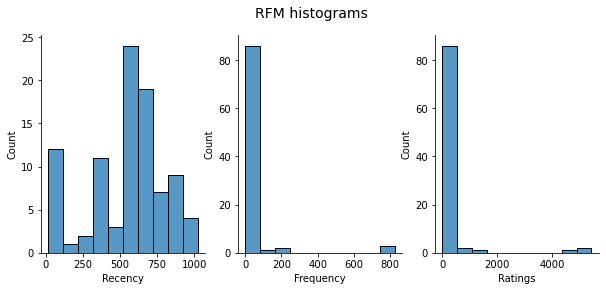

In [144]:
# Histogram of RFM
%matplotlib inline
cols = ['Recency','Frequency','Ratings']

# Draw
fig, ax = plt.subplots(1, 3, figsize=(10,4))
for var, subplot in zip(dspt[cols], ax.flatten()):
    g = sns.histplot(data=dspt,
                bins=10,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("RFM histograms", fontsize=plots_Title_fontSize);

In [145]:
RFMStats.index

Index(['111', '122', '132', '133', '134', '144', '211', '221', '222', '223',
       '233', '243', '244', '311', '312', '321', '322', '323', '332', '333',
       '344', '411', '412', '422'],
      dtype='object', name='RFMScore')

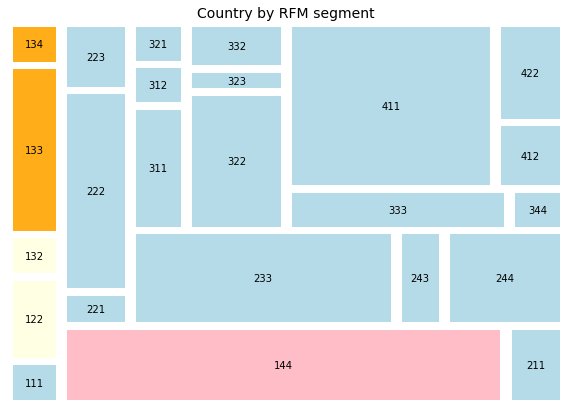

In [146]:
# Treemap with number of customers by segment

# Define colors for levels
def assignColor(rfm):
    if (rfm=='144'):
        hex='lightpink'   # pink
    elif (rfm in ['142','143','133','134','124']):
        hex='orange'   # orange
    elif (rfm in ['141','131','132','122','123','113','114']):
        hex='lightyellow'   # yellow
    else:
        hex='lightblue'   # blue
    return hex

color = [assignColor(x) for x in RFMStats.index]

# Draw
fig, ax = plt.subplots(figsize=(10,7))

# Plot
squarify.plot(sizes=RFMStats['nrCountry'], 
              label=RFMStats.index,
              color = color,
              alpha=.9,
              pad=True)                    

# Decoration
plt.title("Country by RFM segment",fontsize=plots_Title_fontSize)
plt.axis('off')
plt.show()

In [147]:
tempDF = RFMStats
tempDF.sort_values(by=['nrCountry'], ascending=False)

,nrCountry,avgRecency,avgFrequency,avgRatings
RFMScore,,,,
411,15,866.600000,1.000000,4.933333
144,15,180.200000,216.066667,1334.666667
233,11,540.727273,11.545455,75.000000
322,6,677.666667,3.166667,17.833333
222,6,570.500000,3.166667,19.166667
244,5,565.400000,61.400000,409.600000
133,4,245.750000,12.750000,70.500000
333,4,680.000000,7.000000,45.000000
311,3,667.333333,1.000000,5.000000


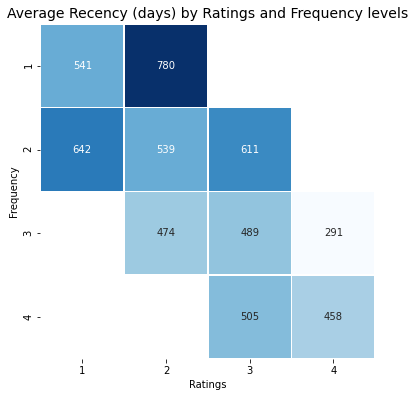

In [148]:
# RFM Heatmap

# Prepare data
tempDF = RFMStats
tempDF['Frequency'] = tempDF.index.str[1]
tempDF['Ratings'] = tempDF.index.str[2]
pt = pd.pivot_table(tempDF, values='avgRecency', 
                     index=['Frequency'], 
                     columns='Ratings')

# Draw
fig , ax = plt.subplots(figsize=(6, 8))
heatmap = sns.heatmap(pt,
                      square = True,
                      linewidths = .5,
                      cmap = 'Blues',
                      cbar=False,
                      fmt='.0f',
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize+2})

# Decoration
plt.title("Average Recency (days) by Ratings and Frequency levels", fontsize=plots_Title_fontSize)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#### Ranking best visitors per localID

In [149]:
# Reset Index localID to use as a variable
dseurotop_portugal.reset_index('localID', inplace = True)

In [150]:
# Copy the remaining variables to the modeling dataset (in this case is only the country)
cols = ['userCountry','localID']
dspt = dspt.merge(dseurotop_portugal[cols], how='left', left_index=True, right_on='userCountry').drop(columns='userCountry')

In [151]:
# Encode categorical variables to dummy variables
#For more information the different methods to enconde categorical variables check https://contrib.scikit-learn.org/category_encoders/
cols = ['localID']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
dspt = ce_one_hot.fit_transform(dspt)

In [152]:
# Create a copy of the dataset just with the columns to analyze
dspt_analysis = dspt.drop(columns=['RScore','FScore','MScore','RFMScore'])

In [153]:
# Check the mean values of each segment
segmentsMeanDF = pd.DataFrame(dspt_analysis.groupby(dspt['RFMScore'].values).mean())
segmentsMeanDF.transpose()

,111,122,132,133,134,144,211,221,222,223,...,312,321,322,323,332,333,344,411,412,422
Recency,79.0,79.000000,291.000000,228.712121,291.000000,74.982064,550.5,596.000000,565.480000,496.937500,...,718.0,688.000000,676.375000,718.000000,659.846154,678.230769,627.000000,861.1875,841.0,824.272727
Frequency,1.0,3.000000,6.000000,13.227273,16.000000,649.034987,1.0,2.000000,3.480000,3.437500,...,1.0,2.000000,3.208333,2.000000,6.000000,7.358974,30.000000,1.0000,1.0,2.909091
Ratings,5.0,23.636364,31.000000,72.545455,118.000000,4016.685120,3.0,8.000000,22.200000,38.500000,...,10.0,8.000000,18.500000,34.000000,26.538462,46.666667,191.000000,5.0625,12.4,18.727273
FrequencyLog,0.0,1.098612,1.791759,2.564154,2.772589,6.176173,0.0,0.693147,1.217854,1.224473,...,0.0,0.693147,1.138916,0.693147,1.791759,1.960209,3.401197,0.0000,0.0,1.008214
localID_MAG021,1.0,0.181818,0.285714,0.151515,0.200000,0.176484,0.0,0.000000,0.080000,0.250000,...,0.0,0.500000,0.041667,0.142857,0.461538,0.179487,0.279070,0.1250,0.0,0.090909
localID_MAG010,0.0,0.272727,0.142857,0.393939,0.240000,0.246678,0.0,0.500000,0.320000,0.125000,...,0.5,0.000000,0.458333,0.142857,0.153846,0.205128,0.162791,0.3750,0.2,0.181818
localID_MAG014,0.0,0.272727,0.000000,0.227273,0.280000,0.205270,0.5,0.500000,0.200000,0.000000,...,0.5,0.000000,0.208333,0.142857,0.076923,0.205128,0.139535,0.1875,0.0,0.272727
localID_MAG032,0.0,0.181818,0.428571,0.106061,0.120000,0.182462,0.5,0.000000,0.200000,0.187500,...,0.0,0.000000,0.125000,0.285714,0.153846,0.153846,0.186047,0.2500,0.4,0.181818
localID_MAG049,0.0,0.090909,0.000000,0.015152,0.080000,0.053587,0.0,0.000000,0.040000,0.125000,...,0.0,0.500000,0.041667,0.142857,0.076923,0.025641,0.116279,0.0000,0.0,0.000000
localID_MAG047,0.0,0.000000,0.142857,0.106061,0.080000,0.107617,0.0,0.000000,0.160000,0.187500,...,0.0,0.000000,0.083333,0.142857,0.076923,0.230769,0.046512,0.0625,0.4,0.272727


In [154]:
# Analyze one segment in specific
segmentsMeanDF.loc['144']

Recency             74.982064
Frequency          649.034987
Ratings           4016.685120
FrequencyLog         6.176173
localID_MAG021       0.176484
localID_MAG010       0.246678
localID_MAG014       0.205270
localID_MAG032       0.182462
localID_MAG049       0.053587
localID_MAG047       0.107617
localID_MAG093       0.027901
Name: 144, dtype: float64

#### Ranking best visitors per Triptype

In [155]:
# Compute totals per customer
dateMax1 = dseurotop_portugal.reviewWritten.max()
dspt1 = dseurotop_portugal.groupby(['userCountry']).agg(Recency=('reviewVisited', lambda date: (dateMax1 - date.max()).days),
                                   Frequency=('userName', lambda i: len(i.unique())),
                                   Ratings=('reviewRating', 'sum')).fillna(0)

In [156]:
# Calculate RMF scores

# Function
def RFMScore(x, col):
    if x <= dspt1.quantile(0.25)[col]:
        return '1'
    elif x <= dspt1.quantile(0.5)[col]:
        return '2'
    elif x <= dspt1.quantile(0.75)[col]:
        return '3'
    else:
        return '4'

# Process
dspt1['RScore'] = dspt1['Recency'].apply(RFMScore, col='Recency')
dspt1['FScore'] = dspt1['Frequency'].apply(RFMScore, col='Frequency')
dspt1['MScore'] = dspt1['Ratings'].apply(RFMScore, col='Ratings')


In [157]:
# Transform to string
cols = ['RScore','FScore','MScore']
dspt1[cols] = dspt1[cols].astype(str)

# Concatenate
dspt1['RFMScore'] = dspt1['RScore'] + dspt1['FScore'] + dspt1['MScore']

# Sort
dspt1 = dspt1.sort_values(by=['RFMScore'])

In [158]:
# Copy the remaining variables to the modeling dataset (in this case is only the tripType)
cols = ['userCountry','tripType']
dspt1 = dspt1.merge(dseurotop_portugal[cols], how='left', left_index=True, right_on='userCountry').drop(columns='userCountry')

In [159]:
# Encode categorical variables to dummy variables
#For more information the different methods to enconde categorical variables check https://contrib.scikit-learn.org/category_encoders/
cols = ['tripType']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
dspt1 = ce_one_hot.fit_transform(dspt1)

In [160]:
# Create a copy of the dataset just with the columns to analyze
dspt_analysis1 = dspt1.drop(columns=['RScore','FScore','MScore','RFMScore'])

In [161]:
# Check the mean values of each segment
segmentsMeanDF1 = pd.DataFrame(dspt_analysis1.groupby(dspt1['RFMScore'].values).mean())
segmentsMeanDF1.transpose()

,111,122,132,133,134,144,211,221,222,223,...,312,321,322,323,332,333,344,411,412,422
Recency,79.0,79.000000,291.000000,228.712121,291.00,74.982064,550.5,596.0,565.48,496.9375,...,718.0,688.0,676.375000,718.000000,659.846154,678.230769,627.000000,861.1875,841.0,824.272727
Frequency,1.0,3.000000,6.000000,13.227273,16.00,649.034987,1.0,2.0,3.48,3.4375,...,1.0,2.0,3.208333,2.000000,6.000000,7.358974,30.000000,1.0000,1.0,2.909091
Ratings,5.0,23.636364,31.000000,72.545455,118.00,4016.685120,3.0,8.0,22.20,38.5000,...,10.0,8.0,18.500000,34.000000,26.538462,46.666667,191.000000,5.0625,12.4,18.727273
tripType_Other,1.0,0.454545,0.142857,0.242424,0.24,0.325509,0.5,0.0,0.36,0.3125,...,1.0,0.5,0.416667,0.142857,0.461538,0.230769,0.325581,0.2500,0.0,0.636364
tripType_Solo,0.0,0.272727,0.000000,0.166667,0.08,0.059123,0.0,0.0,0.12,0.1875,...,0.0,0.0,0.000000,0.000000,0.307692,0.051282,0.093023,0.1875,0.0,0.000000
tripType_Family,0.0,0.181818,0.000000,0.090909,0.20,0.110496,0.0,0.5,0.12,0.0000,...,0.0,0.0,0.166667,0.000000,0.000000,0.205128,0.069767,0.0625,0.0,0.272727
tripType_Friends,0.0,0.090909,0.428571,0.181818,0.28,0.119796,0.0,0.0,0.24,0.1875,...,0.0,0.0,0.125000,0.857143,0.000000,0.153846,0.046512,0.2500,0.6,0.000000
tripType_Couples,0.0,0.000000,0.428571,0.318182,0.20,0.380647,0.5,0.5,0.16,0.3125,...,0.0,0.5,0.291667,0.000000,0.230769,0.333333,0.465116,0.1250,0.4,0.090909
tripType_Business,0.0,0.000000,0.000000,0.000000,0.00,0.004429,0.0,0.0,0.00,0.0000,...,0.0,0.0,0.000000,0.000000,0.000000,0.025641,0.000000,0.1250,0.0,0.000000


In [162]:
# Analyze one segment in specific
segmentsMeanDF1.loc['144']

Recency                74.982064
Frequency             649.034987
Ratings              4016.685120
tripType_Other          0.325509
tripType_Solo           0.059123
tripType_Family         0.110496
tripType_Friends        0.119796
tripType_Couples        0.380647
tripType_Business       0.004429
Name: 144, dtype: float64

#### Ranking best visitors per seasonVisited

In [163]:
# Compute totals per customer
dateMax2 = dseurotop_portugal.reviewWritten.max()
dspt2 = dseurotop_portugal.groupby(['userCountry']).agg(Recency=('reviewVisited', lambda date: (dateMax2 - date.max()).days),
                                   Frequency=('userName', lambda i: len(i.unique())),
                                   Ratings=('reviewRating', 'sum')).fillna(0)

In [164]:
# Calculate RMF scores

# Function
def RFMScore(x, col):
    if x <= dspt2.quantile(0.25)[col]:
        return '1'
    elif x <= dspt2.quantile(0.5)[col]:
        return '2'
    elif x <= dspt2.quantile(0.75)[col]:
        return '3'
    else:
        return '4'

# Process
dspt2['RScore'] = dspt2['Recency'].apply(RFMScore, col='Recency')
dspt2['FScore'] = dspt2['Frequency'].apply(RFMScore, col='Frequency')
dspt2['MScore'] = dspt2['Ratings'].apply(RFMScore, col='Ratings')

In [165]:
# Transform to string
cols = ['RScore','FScore','MScore']
dspt2[cols] = dspt2[cols].astype(str)

# Concatenate
dspt2['RFMScore'] = dspt2['RScore'] + dspt2['FScore'] + dspt2['MScore']

# Sort
dspt2 = dspt2.sort_values(by=['RFMScore'])

In [166]:
# Copy the remaining variables to the modeling dataset (in this case is only the seasonVisited)
cols = ['userCountry','seasonVisited']
dspt2 = dspt2.merge(dseurotop_portugal[cols], how='left', left_index=True, right_on='userCountry').drop(columns='userCountry')

In [167]:
# Encode categorical variables to dummy variables
#For more information the different methods to enconde categorical variables check https://contrib.scikit-learn.org/category_encoders/
cols = ['seasonVisited']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
dspt2 = ce_one_hot.fit_transform(dspt2)

In [168]:
# Create a copy of the dataset just with the columns to analyze
dspt_analysis2 = dspt2.drop(columns=['RScore','FScore','MScore','RFMScore'])

In [169]:
# Check the mean values of each segment
segmentsMeanDF2 = pd.DataFrame(dspt_analysis2.groupby(dspt2['RFMScore'].values).mean())
segmentsMeanDF2.transpose()

,111,122,132,133,134,144,211,221,222,223,...,312,321,322,323,332,333,344,411,412,422
Recency,79.0,79.000000,291.000000,228.712121,291.00,74.982064,550.5,596.0,565.48,496.9375,...,718.0,688.0,676.375000,718.0,659.846154,678.230769,627.000000,861.1875,841.0,824.272727
Frequency,1.0,3.000000,6.000000,13.227273,16.00,649.034987,1.0,2.0,3.48,3.4375,...,1.0,2.0,3.208333,2.0,6.000000,7.358974,30.000000,1.0000,1.0,2.909091
Ratings,5.0,23.636364,31.000000,72.545455,118.00,4016.685120,3.0,8.0,22.20,38.5000,...,10.0,8.0,18.500000,34.0,26.538462,46.666667,191.000000,5.0625,12.4,18.727273
seasonVisited_Summer,1.0,0.636364,0.142857,0.454545,0.08,0.370461,0.0,0.0,0.36,0.4375,...,1.0,0.0,0.416667,1.0,0.230769,0.384615,0.488372,0.4375,0.0,0.454545
seasonVisited_Winter,0.0,0.272727,0.000000,0.136364,0.20,0.203720,0.5,0.5,0.32,0.3125,...,0.0,0.0,0.083333,0.0,0.153846,0.205128,0.093023,0.1875,0.0,0.272727
seasonVisited_Spring,0.0,0.090909,0.285714,0.363636,0.44,0.271479,0.5,0.5,0.28,0.2500,...,0.0,0.5,0.125000,0.0,0.461538,0.256410,0.372093,0.3125,1.0,0.272727
seasonVisited_Autumn,0.0,0.000000,0.571429,0.045455,0.28,0.154340,0.0,0.0,0.04,0.0000,...,0.0,0.5,0.375000,0.0,0.153846,0.153846,0.046512,0.0625,0.0,0.000000


In [170]:
# Analyze one segment in specific
segmentsMeanDF2.loc['144']

Recency                   74.982064
Frequency                649.034987
Ratings                 4016.685120
seasonVisited_Summer       0.370461
seasonVisited_Winter       0.203720
seasonVisited_Spring       0.271479
seasonVisited_Autumn       0.154340
Name: 144, dtype: float64





Now we proceed with the dataset analysis using the segment of most valued customers that we found with the RFM model. Where we try to understand some patterns such as: what's the most visited or reviewed attractions, which ones our segments visit to find out what are our main competitors.

First, we do the analysis for the general dataset. Then we will use with our segment "most valued customers" to analize the Portugal context only.



Main general insigths:


In [171]:
#create a new copy of the dataset
dsAT = dseurotop_prep2.copy()

#### What are the top20 most reviewed attractions?

In [172]:
dsAT.groupby(['Name'])['totalReviews'].median().nlargest(20)

Name
Basilica of the Sagrada Familia         163828
Parc Guell                               75909
Tower of London                          65646
Casa Batllo                              57180
Staromestske namesti                     55541
Edinburgh Castle                         51324
Schönbrunn Palace                        42555
The Alhambra                             42192
Canal Grande                             41233
Torre de Belém                           36979
Acropolis                                35716
Real Alcazar de Sevilla                  34703
Grand Place                              34353
Mosteiro dos Jeronimos                   30707
Mezquita Cathedral de Cordoba            28236
The State Hermitage Museum               26604
Krakow's Rynek Glowny Central Square     26475
Palace of Versailles                     26328
Catedral de Sevilla                      26042
Ponte de Dom Luís I                      24454
Name: totalReviews, dtype: int64

#### What are the top20 most visited countries? 

In [173]:
dsAT['Country'].value_counts().nlargest(20)

Spain             22006
England           18415
Italy              6847
Scotland           6044
Portugal           5530
Poland             4416
Austria            3842
France             3441
Greece             3156
Russia             2750
Croatia            2322
Belgium            2064
Hungary            1636
Germany            1269
Estonia             863
Scot                669
Turkey              660
Cyprus              608
Czech Republic      485
Montenegro          441
Name: Country, dtype: int64

In [174]:
#top20 visitors countries? (weight in the dataset)

In [175]:
#delete UNKNOWN values

dsATwithoutUnknown = dsAT[dsAT['userCountry'] != 'UNKNOWN']

In [176]:
#top20 visitors countries? without 'UNKNOWN' (weight in the dataset)

dsATwithoutUnknown['userCountry'].value_counts(normalize=True).nlargest(20)

UK                 0.383482
USA                0.257125
AUSTRALIA          0.055650
CANADA             0.042946
SPAIN              0.015951
IRELAND            0.014561
INDIA              0.013597
THE NETHERLANDS    0.011258
GERMANY            0.010846
ITALY              0.009826
FRANCE             0.009315
NEW ZEALAND        0.009202
GREECE             0.008606
BELGIUM            0.008436
ISRAEL             0.007628
SINGAPORE          0.006976
ROMANIA            0.006423
SOUTH AFRICA       0.006196
PORTUGAL           0.006182
SWITZERLAND        0.005671
Name: userCountry, dtype: float64

Portugal Context insigths:

#### The impact of covid in Portugal - countries with more visits after Covid

In [177]:
# Portugal: impact of covid - countries with more visits after Covid

covid = pd.crosstab(index = dsATwithoutUnknown['userCountry'], columns=dsATwithoutUnknown['Covid_time'])
covid['Variation (%)'] = ((covid['After_Covid']/covid['Before_Covid']-1)*100).round(1)
covid=covid.sort_values('After_Covid', ascending=False)
covid.head(20)

Covid_time,After_Covid,Before_Covid,Variation (%)
userCountry,,,
UK,4338,22709,-80.9
USA,824,17311,-95.2
SPAIN,151,974,-84.5
CANADA,119,2910,-95.9
GERMANY,119,646,-81.6
THE NETHERLANDS,116,678,-82.9
ITALY,116,577,-79.9
BELGIUM,113,482,-76.6
FRANCE,104,553,-81.2


#### General insights for most valued customers (based in our RFM model)

In [178]:
#subset with our main segments/markets

dsRFM = dsAT[dsAT['userCountry'].isin(['PORTUGAL', 'SWITZERLAND', 'ITALY', 'GREECE', 'GERMANY', 'FRANCE', 'THE NETHERLANDS', 'ROMANIA', 'USA', 'CANADA', 'SOUTH AFRICA', 'UK', 'BELGIUM', 'SPAIN'])]

In [179]:
dsRFM.describe()

,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userContributions,reviewRating,userContributions_tr,positionOnRanking_tr,totalReviews_tr,sitesOnRanking_tr
count,55173.000000,55173.000000,55173.000000,55173.000000,55173.000000,55173.000000,55173.000000,55173.000000,55173.000000,55173.000000
mean,4.485038,3.715876,678.857593,40438.854222,324.153843,4.591793,5.070015,1.398288,31.201535,7.644269
std,0.177456,4.257299,709.469435,42960.026116,984.352974,0.764127,3.023638,0.457623,9.877163,3.147166
min,4.000000,1.000000,5.000000,5179.000000,0.000000,1.000000,0.000000,1.000000,17.301429,1.709976
25%,4.500000,1.000000,153.000000,14152.000000,28.000000,4.000000,3.036589,1.000000,24.188333,5.348481
50%,4.500000,2.000000,430.000000,24454.000000,81.000000,5.000000,4.326749,1.259921,29.025740,7.547842
75%,4.500000,6.000000,1186.000000,51324.000000,245.000000,5.000000,6.257325,1.817121,37.162663,10.585098
max,5.000000,31.000000,2634.000000,163828.000000,19926.000000,5.000000,27.110657,3.141381,54.717894,13.810368


In [180]:
dsRFM.groupby(['Name'])['totalReviews'].median().nlargest(20)

Name
Basilica of the Sagrada Familia         163828
Parc Guell                               75909
Tower of London                          65646
Casa Batllo                              57180
Staromestske namesti                     55541
Edinburgh Castle                         51324
Schönbrunn Palace                        42555
The Alhambra                             42192
Canal Grande                             41233
Torre de Belém                           36979
Acropolis                                35716
Real Alcazar de Sevilla                  34703
Grand Place                              34353
Mosteiro dos Jeronimos                   30707
Mezquita Cathedral de Cordoba            28236
The State Hermitage Museum               26604
Krakow's Rynek Glowny Central Square     26475
Palace of Versailles                     26328
Catedral de Sevilla                      26042
Ponte de Dom Luís I                      24454
Name: totalReviews, dtype: int64

#### top20 countries for RFM segments

In [181]:
dsRFM['Country'].value_counts().nlargest(20)

Spain         13493
England       12368
Italy          4258
Scotland       3860
Portugal       3443
Poland         2667
France         2136
Austria        2034
Greece         1807
Croatia        1415
Russia         1380
Belgium        1283
Hungary         987
Germany         736
Estonia         442
Scot            431
Cyprus          407
Turkey          298
Curaçao         285
Montenegro      277
Name: Country, dtype: int64

<a class="anchor" id="dv">

# 6. Data Visualization

<a class="anchor" id="ga">

## 6.1. General analysis

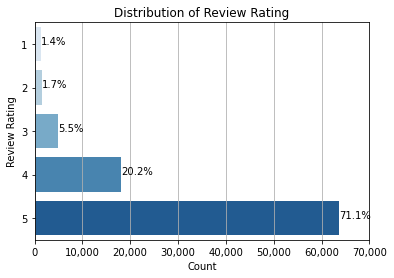

In [182]:
#reviewRating Analysis

ax = sns.countplot(y="reviewRating", data=dseurotop_prep2, palette = 'Blues')
plt.title('Distribution of Review Rating')
plt.xlabel('Count')
plt.ylabel('Review Rating')

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.yaxis.grid(False)
ax.xaxis.grid(True)
plt.xticks(np.arange(0,80000,10000))

total = len(dseurotop_prep2['reviewRating'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total) 
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.show()

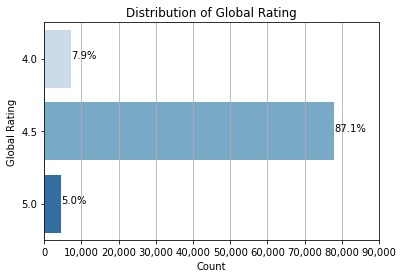

In [183]:
#globalRate Analysis

ax = sns.countplot(y="globalRating", data=dseurotop_prep2, palette = 'Blues')
plt.title('Distribution of Global Rating')
plt.xlabel('Count')
plt.ylabel('Global Rating')

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.yaxis.grid(False)
ax.xaxis.grid(True)
plt.xticks(np.arange(0,100000,10000))

total = len(dseurotop_prep2['globalRating'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total) 
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.show()

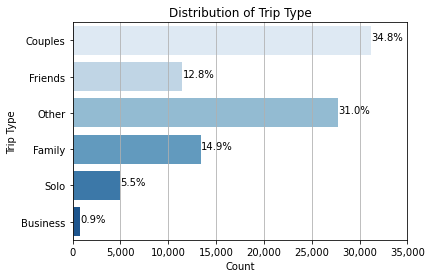

In [184]:
#TripType Analysis

ax = sns.countplot(y="tripType", data=dseurotop_prep2, palette = 'Blues')
plt.title('Distribution of Trip Type')
plt.xlabel('Count')
plt.ylabel('Trip Type')
plt.xticks(np.arange(0,40000,5000))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.yaxis.grid(False)
ax.xaxis.grid(True)

total = len(dseurotop_prep2['tripType'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total) 
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.show()

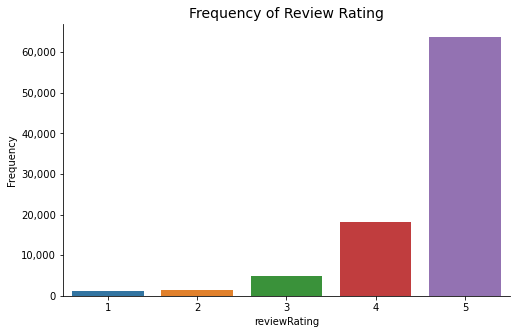

In [185]:
# Frequency of Review Rating

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.countplot(data=dseurotop_prep2, x=dseurotop_prep2['reviewRating'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency of Review Rating", fontsize=plots_Title_fontSize)
plt.xlabel("reviewRating")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'CountPlot.svg', bbox_inches="tight")

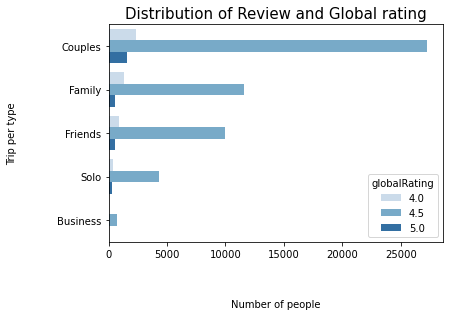

In [186]:
#Check distribution of globalRating and tripType
sns.countplot(y='tripType', hue='globalRating',data = dseurotop_prep2, palette = 'Blues', 
              order=['Couples','Family','Friends','Solo','Business'])
plt.ylabel("Trip per type", labelpad = 40)
plt.xlabel("Number of people", labelpad = 40)
plt.title('Distribution of Review and Global rating', fontsize = 15)
plt.show()

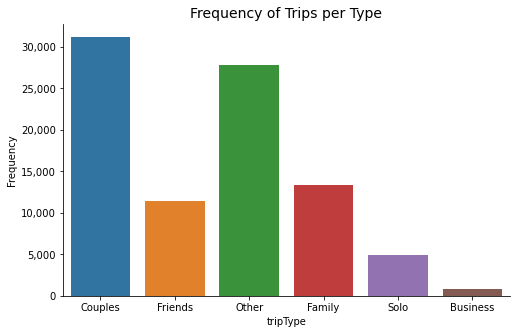

In [187]:
# Frequency of Trips per type

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.countplot(data=dseurotop_prep2, x=dseurotop_prep2['tripType'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Frequency of Trips per Type", fontsize=plots_Title_fontSize)
plt.xlabel("tripType")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)

# Save to file
#fig.savefig(fname=exportsFolder+'CountPlot.svg', bbox_inches="tight")

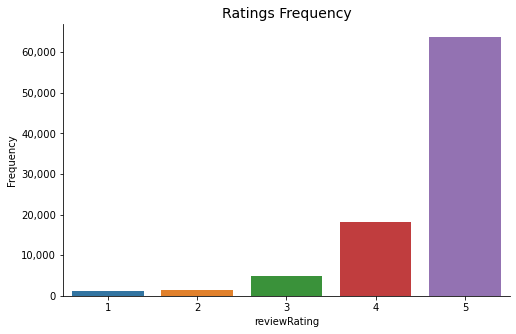

In [188]:
# COUNT PLOT

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.countplot(data=dseurotop_prep2, x=dseurotop_prep2['reviewRating'])

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Ratings Frequency", fontsize=plots_Title_fontSize)
plt.xlabel("reviewRating")
plt.ylabel("Frequency")
plt.rc('axes', labelsize=subPlots_label_fontSize)


# Save to file
#fig.savefig(fname=exportsFolder+'CountPlot.svg', bbox_inches="tight")

[Text(0, 0, '0'),
 Text(0, 1, '1'),
 Text(0, 2, '2'),
 Text(0, 3, '3'),
 Text(0, 4, '4'),
 Text(0, 5, '5')]

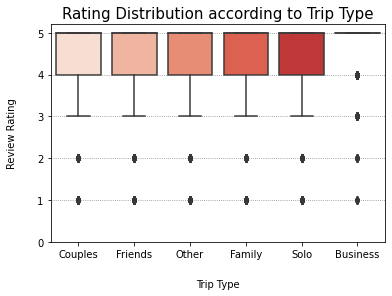

In [189]:
#Check reviews distribution according to tripType

sns.boxplot(x = 'tripType', y = 'reviewRating', data = dseurotop_prep2, palette = 'Reds')

axes = plt.gca()
axes.yaxis.grid(color = '0.5',linestyle='dotted')
plt.ylabel("Review Rating", labelpad = 20)
plt.xlabel("Trip Type", labelpad = 20)
plt.title('Rating Distribution according to Trip Type', fontsize = 15)
plt.yticks(np.arange(0,6,1))
axes.set_yticklabels(['{:,}'.format(int(x)) for x in axes.get_yticks().tolist()])

#### Now we will analyze the portuguese tourism context, focusing in our most value customers from RFM model and take in consideration the pandemic situation since march '21

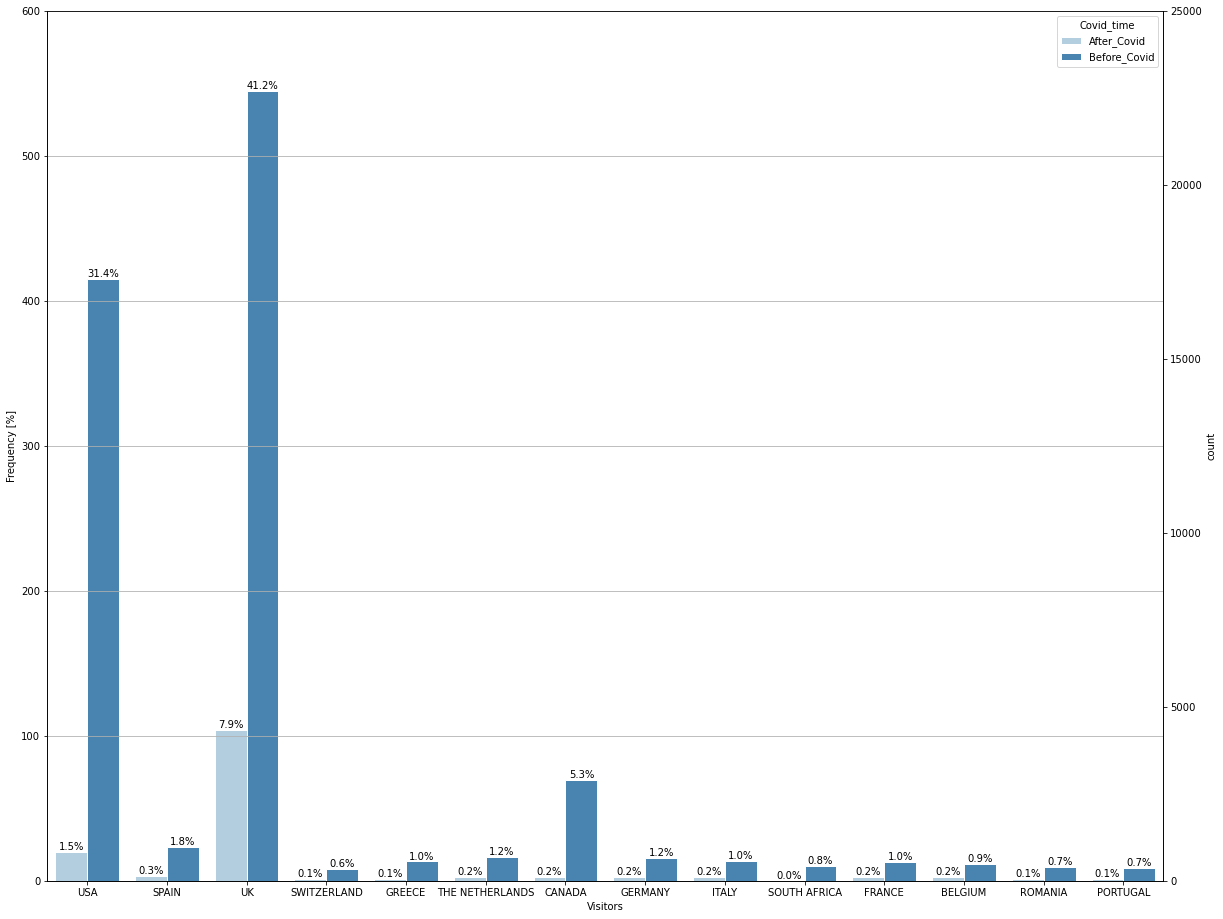

In [190]:
#impact of covid - before and after

ncount = len(dsRFM)
plt.figure(figsize=(20,16))
ax = sns.countplot(x="userCountry", hue="Covid_time", data=dsRFM,  palette = 'Blues', edgecolor = 'w')
plt.xlabel('Visitors')
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax2.set_ylim(0,600)
ax.set_ylim(0,25000)
ax2.grid(None)

In [191]:
dsRFMtop3 = dsRFM[dsRFM['userCountry'].isin(['USA', 'UK', 'CANADA'])]

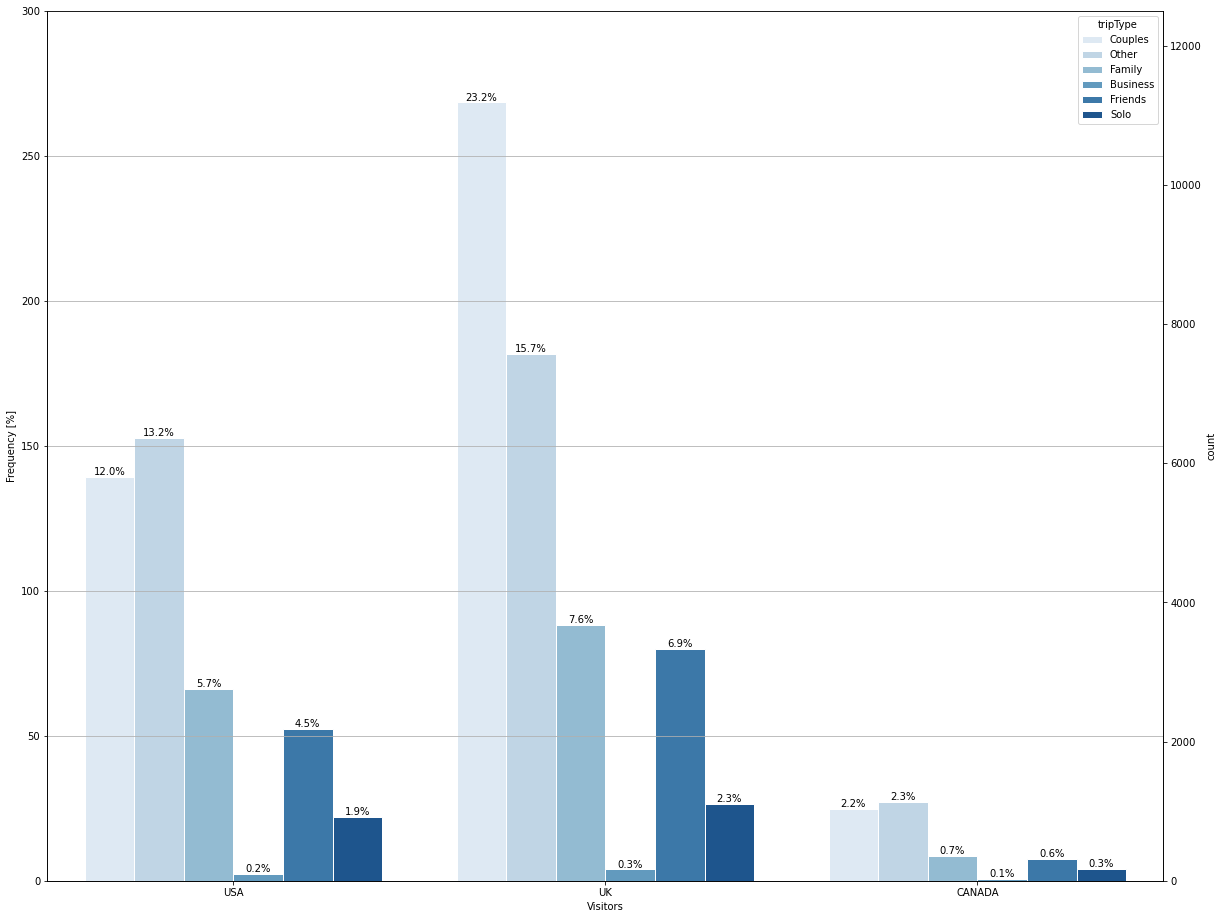

In [192]:
#best value customers vs tripType

ncount = len(dsRFMtop3)
plt.figure(figsize=(20,16))
ax = sns.countplot(x="userCountry", hue="tripType", data=dsRFMtop3,  palette = 'Blues', edgecolor = 'w')
plt.xlabel('Visitors')
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax2.set_ylim(0,300)
ax.set_ylim(0,12500)
ax2.grid(None)

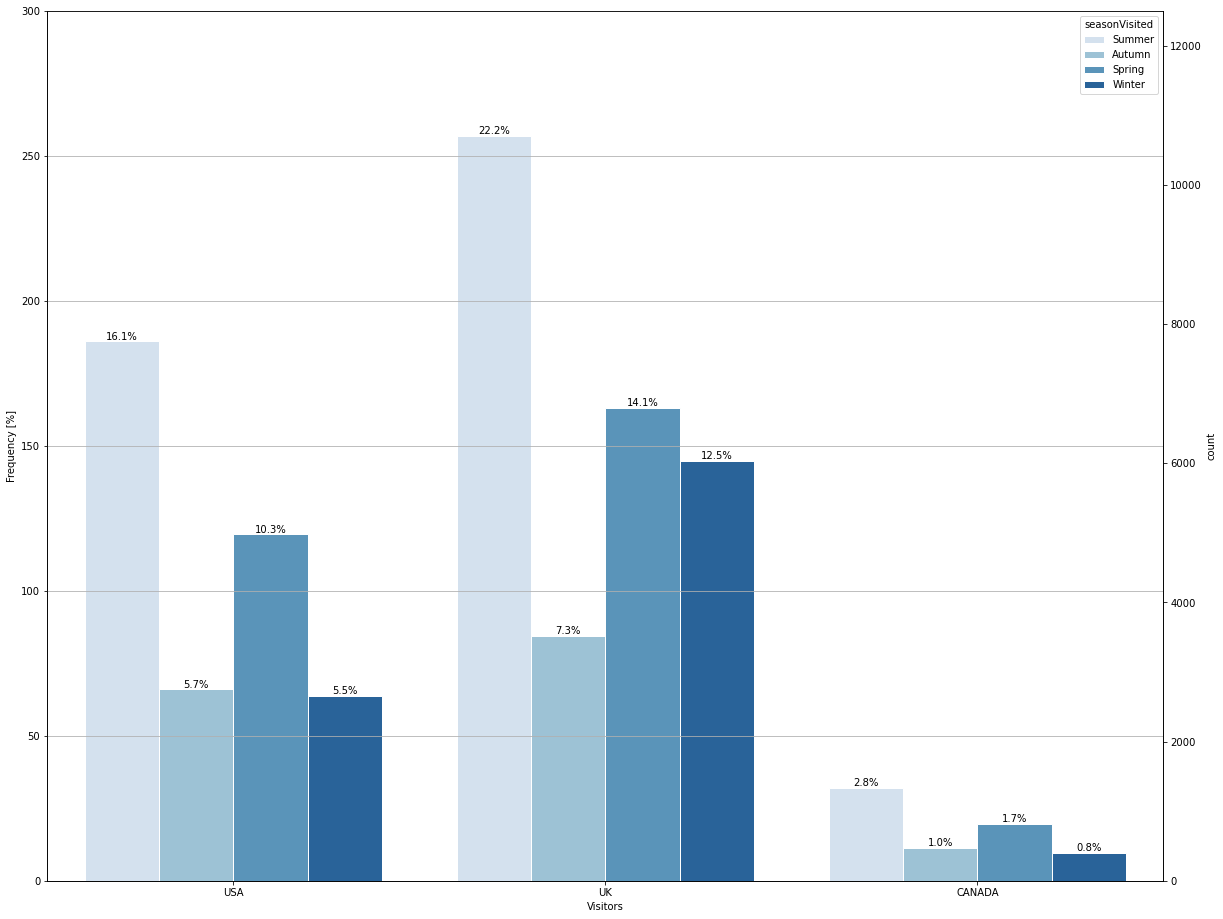

In [193]:
#best value customers top3 vs Season

ncount = len(dsRFMtop3)
plt.figure(figsize=(20,16))
ax = sns.countplot(x="userCountry", hue="seasonVisited", data=dsRFMtop3,  palette = 'Blues', edgecolor = 'w')
plt.xlabel('Visitors')
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax2.set_ylim(0,300)
ax.set_ylim(0,12500)
ax2.grid(None)

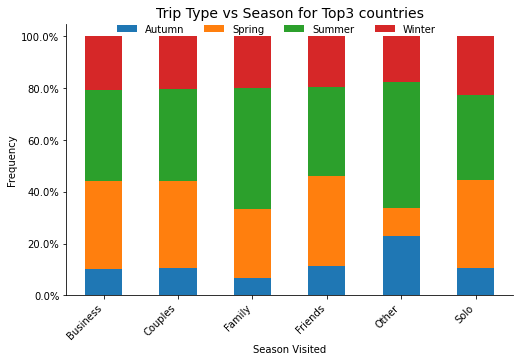

In [194]:
#top3 season vs tripType

# STACKED BAR PLOT - DISTRIBUTION

# Aggregate and sort
tempDF = dsRFM.pivot_table(values=['userCountry'], 
                      index='tripType',
                      columns='seasonVisited',
                      aggfunc='count',
                      fill_value=0)
tempDF = tempDF.div(tempDF.sum(1), axis=0)

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = tempDF.plot(kind='bar', stacked=True, ax=ax)

# Decoration
vals = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(vals))
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
sns.despine()
plt.title("Trip Type vs Season for Top3 countries", fontsize=plots_Title_fontSize)
plt.xlabel("Season Visited")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
labels = ['Autumn', 'Spring', 'Summer', 'Winter']
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=4, bbox_to_anchor=(0.47, 1.03), frameon=False)

# Save to file
#fig.savefig(fname=exportsFolder+'StackedBar100Percent.svg', bbox_inches="tight")

<a class="anchor" id="rs">

# 7. Recommendation  systems

After analysing our data, we proceed with a creation of a recommendation system based on the attractions that our best value customers visited. Our goal is to recommend portuguese attractions take in consideration the attractions from popular countries, season and trip type.

#### RECOMMENDATION FOR OUR MOST IMPORTANT SEGMENT

The follower model has the purpose to identify a sort of specific recommendations to our number one and most value segment. (althought, it is possible to reproduce all the steps for other countries in order to disclosure the respetive recommendation for each country)

In [195]:
#create new variable to identify each review
dsRFM_rec = dsRFM.copy()
dsRFM_rec['ReviewID'] = np.arange(dsRFM.shape[0])

In [196]:
# From the customers with more purchases, let's select one
topCountries = dsRFM_rec.groupby('userCountry')['userName'].nunique().sort_values(ascending=False)
topCountries.head(20)

userCountry
UK                 20129
USA                12022
CANADA              2082
SPAIN                836
THE NETHERLANDS      579
GERMANY              536
FRANCE               501
ITALY                485
BELGIUM              432
GREECE               422
PORTUGAL             338
SOUTH AFRICA         296
ROMANIA              294
SWITZERLAND          293
Name: userName, dtype: int64

In [197]:
# Check the visits of the first country
country1 = 'UK'
dsRFM_rec[dsRFM_rec['userCountry']==country1].head()

,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,...,userContributions_tr,positionOnRanking_tr,totalReviews_tr,sitesOnRanking_tr,userCity,userCountry,Covid time,Covid_time,seasonVisited,ReviewID
localID,,,,,,,,,,,,,,,,,,,,,
MAG001,2021-08-20 08:24:40.227,4.5,1,1186,163828,quincy2008@quincy2008,"Barnsley, UK",137,Family,2021-08-12,...,5.155137,1.0,54.717894,10.585098,Barnsley,UK,True,After_Covid,Summer,4
MAG001,2021-08-20 08:24:51.741,4.5,1,1186,163828,Tadas B@756tadasb,"London, UK",63,Other,2021-07-10,...,3.979057,1.0,54.717894,10.585098,London,UK,True,After_Covid,Summer,14
MAG001,2021-08-20 08:24:57.605,4.5,1,1186,163828,Geordie23PNR@Geordie23PNR,"Birtley, UK",21,Business,2021-06-30,...,2.758924,1.0,54.717894,10.585098,Birtley,UK,True,After_Covid,Summer,18
MAG001,2021-08-20 08:24:57.713,4.5,1,1186,163828,Charlottie2894@Charlottie2894,"Lincolnshire, UK",76,Other,2021-06-02,...,4.235824,1.0,54.717894,10.585098,Lincolnshire,UK,True,After_Covid,Summer,24
MAG001,2021-08-20 08:25:02.909,4.5,1,1186,163828,Whistlinginthewind1@Whistlinginthewind1,"London, UK",27,Other,2021-05-22,...,3.000000,1.0,54.717894,10.585098,London,UK,True,After_Covid,Summer,26


In [198]:
# Create a pivot table with visitors per attractions

ptvisitorsAttraction = pd.pivot_table(dsRFM_rec[dsRFM_rec['userCountry']==country1][['userName','Name']],
                    index='userName',                             # Each row will be a visit (transaction)
                    columns='Name',                  # Each attraction will be a column
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
                            
print(ptvisitorsAttraction.shape)
ptvisitorsAttraction.head(10)

(20129, 95)


Name,Abbaye du Mont-Saint-Michel,Acropolis,Acueduct of Segovia,Alcázar of Segovia,Ancient City of Ephesus,Arena di Verona,Basilica Papale e Sacro Convento...,Basilica of the Sagrada Familia,Bath Abbey,Blenheim Palace,...,Torre de Belém,Tower of Hercules (Torre de Hercules),Tower of London,Valle dei Templi,Vatican City,Vieux Lyon,Villa d'Este,Vilnius Old Town,Westminster Abbey,Wieliczka Salt Mine
userName,,,,,,,,,,,,,,,,,,,,,
#Ciccone@932emzc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#moving mountains@peaceat28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
#travelswithhugodog@ajotraveller2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--Isma-1010@--Isma-1010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
007SpecialK@007SpecialK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
011@bonitopeach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0213@0213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05MK1412@05MK1412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0798@0798anne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
# Compute the distance and transform it to a dataframe for visualization
# Info on the "dice" implementation https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.dice.html

visits_rec = ptvisitorsAttraction.to_numpy().T
distMatrix = pairwise_distances(visits_rec,metric='dice')
distMatrixDF = pd.DataFrame(distMatrix, columns=ptvisitorsAttraction.columns, index=ptvisitorsAttraction.columns)
distMatrixDF = distMatrixDF.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
distMatrixDF

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


Name,Abbaye du Mont-Saint-Michel,Acropolis,Acueduct of Segovia,Alcázar of Segovia,Ancient City of Ephesus,Arena di Verona,Basilica Papale e Sacro Convento...,Basilica of the Sagrada Familia,Bath Abbey,Blenheim Palace,...,Torre de Belém,Tower of Hercules (Torre de Hercules),Tower of London,Valle dei Templi,Vatican City,Vieux Lyon,Villa d'Este,Vilnius Old Town,Westminster Abbey,Wieliczka Salt Mine
Name,,,,,,,,,,,,,,,,,,,,,
Abbaye du Mont-Saint-Michel,1.000000,0.000000,0.000000,0.000000,0.026667,0.000000,0.000000,0.002404,0.000000,0.000000,...,0.006211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Acropolis,0.000000,1.000000,0.000000,0.000000,0.000000,0.003460,0.000000,0.006170,0.005083,0.007744,...,0.000000,0.000000,0.007955,0.000000,0.004000,0.000000,0.005051,0.004464,0.009662,0.002478
Acueduct of Segovia,0.000000,0.000000,1.000000,0.576271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007143,0.000000,0.000000,0.000000,0.022599,0.000000,0.000000,0.000000,0.000000,0.008264
Alcázar of Segovia,0.000000,0.000000,0.576271,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007435,0.000000,0.000000,0.000000,0.012048,0.000000,0.000000,0.000000,0.000000,0.008457
Ancient City of Ephesus,0.026667,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.003984,0.002674,...,0.012579,0.021505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005952,0.000000
Arena di Verona,0.000000,0.003460,0.000000,0.000000,0.000000,1.000000,0.000000,0.002214,0.000000,0.002235,...,0.004301,0.000000,0.002466,0.000000,0.000000,0.008000,0.007752,0.000000,0.000000,0.000000
Basilica Papale e Sacro Convento...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001414,0.019802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Basilica of the Sagrada Familia,0.002404,0.006170,0.000000,0.000000,0.000000,0.002214,0.000000,1.000000,0.004960,0.003537,...,0.006550,0.000000,0.009368,0.000000,0.006940,0.000000,0.002462,0.002385,0.005405,0.003929
Bath Abbey,0.000000,0.005083,0.000000,0.000000,0.003984,0.000000,0.000000,0.004960,1.000000,0.012681,...,0.005935,0.000000,0.006554,0.000000,0.010508,0.004357,0.000000,0.000000,0.008671,0.006834


In [200]:
# Let's define the portuguese attractions to simulate
ptAttractions = ['Torre de Belém','Mosteiro dos Jeronimos', 'Ponte de Dom Luís I', 'Park and National Palace of Pena', 'Quinta da Regaleira', 'Cais da Ribeira','Bom Jesus do Monte']

In [201]:
# Let's create a list of products not in the current basket
EuropeanAttractions = [x for x in distMatrixDF.columns if x not in ptAttractions]

# Create a temporary dataframe with rows in basket and columns not in basket and 
tempDF = distMatrixDF[distMatrixDF.index.isin(ptAttractions)][EuropeanAttractions]

# Create a max similarity dataframe do store the results
maxSimilarDF = pd.DataFrame(columns=['European Attractions','Portuguese Attractions','Similarity'])

# For each item not in the basket
for c in EuropeanAttractions:
    # Get maximum similarity value of the item (index of the row of the item in the basket)
    indexOfMax = tempDF[c].argmax()
    # Add the results to the dataframe
    maxSimilarDF = maxSimilarDF.append(
                   {'European Attractions':c,
                    'Portuguese Attractions':tempDF.iloc[indexOfMax].name,
                    'Similarity':tempDF.iloc[indexOfMax][c]
                    }, ignore_index=True
    )

# Sort results by similarity
maxSimilarDF = maxSimilarDF.sort_values(by='Similarity', ascending=False)

In [202]:
# Simulate presentation of top n recommendations (Recommendations are the items "NotInBaskket")
n = 10
maxSimilarDF.head(n)

,European Attractions,Portuguese Attractions,Similarity
17,Catedral De Burgos,Bom Jesus do Monte,0.045455
71,Staromestske namesti,Cais da Ribeira,0.030612
84,Villa d'Este,Park and National Palace of Pena,0.027650
46,Old City Riga (Vecriga),Bom Jesus do Monte,0.024096
16,Casa Milà - La Pedrera,Quinta da Regaleira,0.024000
53,Palazzo di Diocleziano,Quinta da Regaleira,0.021739
79,Tower of Hercules (Torre de Hercules),Cais da Ribeira,0.020000
22,Centro Storico,Quinta da Regaleira,0.018868
20,Cathedral De Santiago de Compostela,Cais da Ribeira,0.018692
83,Vieux Lyon,Cais da Ribeira,0.018182


#### RECOMMENDATION BASED ON ALL PREVIOUS VISITS

We also thought of developing a model capable of offering recommendations based on the previous visits from our potential customers. For this model, we want to use a set of attractions from the country with more attractions.

In [203]:
# List the number of attractions by country #top10

dsRFM_rec['Country'].value_counts().head(10)

Spain       13493
England     12368
Italy        4258
Scotland     3860
Portugal     3443
Poland       2667
France       2136
Austria      2034
Greece       1807
Croatia      1415
Name: Country, dtype: int64

In [204]:
# Let's define one popular spanish attraction to simulate the problem
spanishattractions = ['Basilica of the Sagrada Familia', 'Parc Guell', 'The Alhambra', 'Real Alcazar de Sevilla', 'Acueduct of Segovia']

# Families to recomend
attractionsToRecommend = ['Portugal']

In [205]:
# Create a pivot table with products per document (only desired products)
ptSpainRec = pd.pivot_table(dsRFM_rec[(dsRFM_rec['Name'].isin(spanishattractions)) | (dsRFM_rec['Country'].isin(attractionsToRecommend))][['userName','Name']],
                    index='userName',                             # Each row will be a document (transaction)
                    columns='Name',                  # Each product will be a column
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
                            
print(ptSpainRec.shape)
ptSpainRec.head()

(9736, 12)


Name,Acueduct of Segovia,Basilica of the Sagrada Familia,Bom Jesus do Monte,Cais da Ribeira,Mosteiro dos Jeronimos,Parc Guell,Park and National Palace of Pena,Ponte de Dom Luís I,Quinta da Regaleira,Real Alcazar de Sevilla,The Alhambra,Torre de Belém
userName,,,,,,,,,,,,
#moving mountains@peaceat28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#taxi de Barcelona #taxi#aeropuer@cavataxi,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05MK1412@05MK1412,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0Garza@0Garza,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
101eggie@101eggie,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [206]:
# Compute the distance and transform it to a dataframe for visualization
SpainVisitors = ptSpainRec.to_numpy().T
distMatrix = pairwise_distances(SpainVisitors,metric='dice')
distMatrixDF = pd.DataFrame(distMatrix, columns=ptSpainRec.columns, index=ptSpainRec.columns)
distMatrixDF = distMatrixDF.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
distMatrixDF

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


Name,Acueduct of Segovia,Basilica of the Sagrada Familia,Bom Jesus do Monte,Cais da Ribeira,Mosteiro dos Jeronimos,Parc Guell,Park and National Palace of Pena,Ponte de Dom Luís I,Quinta da Regaleira,Real Alcazar de Sevilla,The Alhambra,Torre de Belém
Name,,,,,,,,,,,,
Acueduct of Segovia,1.000000,0.005338,0.008621,0.000000,0.009685,0.006830,0.010724,0.008734,0.000000,0.010386,0.019180,0.010730
Basilica of the Sagrada Familia,0.005338,1.000000,0.001246,0.002437,0.012941,0.300631,0.010509,0.005313,0.005114,0.023605,0.029319,0.013055
Bom Jesus do Monte,0.008621,0.001246,1.000000,0.069930,0.015584,0.002352,0.020290,0.050713,0.026966,0.003096,0.001833,0.018265
Cais da Ribeira,0.000000,0.002437,0.069930,1.000000,0.065909,0.004417,0.055000,0.272605,0.036036,0.004280,0.001665,0.054767
Mosteiro dos Jeronimos,0.009685,0.012941,0.015584,0.065909,1.000000,0.018301,0.171340,0.071837,0.102021,0.020148,0.018991,0.348299
Parc Guell,0.006830,0.300631,0.002352,0.004417,0.018301,1.000000,0.011738,0.006494,0.006091,0.027689,0.026758,0.014994
Park and National Palace of Pena,0.010724,0.010509,0.020290,0.055000,0.171340,0.011738,1.000000,0.052402,0.325339,0.021041,0.017445,0.158273
Ponte de Dom Luís I,0.008734,0.005313,0.050713,0.272605,0.071837,0.006494,0.052402,1.000000,0.031111,0.005724,0.006468,0.067618
Quinta da Regaleira,0.000000,0.005114,0.026966,0.036036,0.102021,0.006091,0.325339,0.031111,1.000000,0.006406,0.010294,0.104803


In [207]:
# Let's create a list of products not in the current basket
attractionsToRecommend = [x for x in distMatrixDF.columns if x not in spanishattractions]

# Create a temporary dataframe with rows in basket and columns not in basket and 
tempDF = distMatrixDF[distMatrixDF.index.isin(spanishattractions)][attractionsToRecommend]

# Create a max similarity dataframe do store the results
maxSimilarDF = pd.DataFrame(columns=['Portuguese attractions','Spanish attractions','Similarity'])

# For each item not in the basket
for c in attractionsToRecommend:
    # Get maximum similarity value of the item (index of the row of the item in the basket)
    indexOfMax = tempDF[c].argmax()
    # Add the results to the dataframe
    maxSimilarDF = maxSimilarDF.append(
                   {'Portuguese attractions':c,
                    'Spanish attractions':tempDF.iloc[indexOfMax].name,
                    'Similarity':tempDF.iloc[indexOfMax][c]
                    }, ignore_index=True
    )

# Sort results by similarity
maxSimilarDF = maxSimilarDF.sort_values(by='Similarity', ascending=False)

In [208]:
# Simulate presentation of top n recommendations (Recommendations are the items "NotInBaskket")
n = 5
maxSimilarDF.head(n)

,Portuguese attractions,Spanish attractions,Similarity
3,Park and National Palace of Pena,Real Alcazar de Sevilla,0.021041
2,Mosteiro dos Jeronimos,Real Alcazar de Sevilla,0.020148
6,Torre de Belém,Real Alcazar de Sevilla,0.020080
5,Quinta da Regaleira,The Alhambra,0.010294
4,Ponte de Dom Luís I,Acueduct of Segovia,0.008734
